<a href="https://colab.research.google.com/github/dian-wijayanti/DOKUMEN-TESIS/blob/main/Dokumentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Dataset dan Karakteristik Data

In [ ]:
# Jika menggunakan Google Colab, mount Google Drive terlebih dahulu:
from google.colab import drive
drive.mount('/content/drive')

# Import pustaka yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Modul files dari Colab tidak digunakan lagi karena kita tidak menyimpan grafik)
# from google.colab import files

# Mengatur style visualisasi (digunakan untuk grafik jika diperlukan, tapi tidak wajib)
sns.set(style="whitegrid")

# Path file dataset (dengan ekstensi CSV)
file_path = '/content/drive/My Drive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv'

# Membaca file CSV dengan penanganan error jika file tidak ditemukan
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("File tidak ditemukan. Pastikan path sudah benar.")
    raise

# Menampilkan informasi dasar dataset
print("Ukuran dataset:", df.shape)
print("\nBeberapa baris awal:")
print(df.head())

# Menampilkan informasi tipe data dan nilai yang hilang
print("\nInformasi dataset:")
df.info()

print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif:")
print(df.describe())

# 1. Distribusi Stars dalam bentuk tabel
if 'stars' in df.columns:
    print("\nDistribusi Stars:")
    stars_count = df['stars'].value_counts().sort_index()
    print(stars_count)
else:
    print("\nKolom 'stars' tidak ditemukan dalam dataset.")

# 2. Distribusi Panjang Review dalam bentuk tabel
if 'text' in df.columns:
    # Menghitung panjang review dalam jumlah kata
    df['review_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))
    print("\nDistribusi Panjang Review (Jumlah Kata):")
    # Membuat distribusi dengan membagi panjang review ke dalam 10 bin
    review_length_bins = pd.cut(df['review_length'], bins=10)
    review_length_distribution = review_length_bins.value_counts().sort_index()
    print(review_length_distribution)
else:
    print("\nKolom 'text' tidak ditemukan dalam dataset.")

# 3. Jumlah Review per Tahun dalam bentuk tabel
if 'publishedAtDate' in df.columns:
    # Konversi kolom publishedAtDate ke tipe datetime (dengan timezone UTC dan penanganan error)
    df['publishedAtDate'] = pd.to_datetime(df['publishedAtDate'], utc=True, errors='coerce')

    # Mengurutkan dataframe berdasarkan publishedAtDate
    df_sorted = df.sort_values('publishedAtDate')

    # Menghitung jumlah total review per tahun (termasuk baris dengan teks kosong)
    reviews_per_year = df_sorted.set_index('publishedAtDate').resample('YE').size()

    # Menampilkan hasil perhitungan
    print("\nJumlah Review per Tahun (Berdasarkan publishedAtDate):")
    print(reviews_per_year)
else:
    print("\nKolom 'publishedAtDate' tidak tersedia di dataset.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ukuran dataset: (1243, 68)

Beberapa baris awal:
                                             address            categories/0  \
0  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
1  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
2  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
3  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   
4  Jl. Bhayangkara No.48, Temulawak, Triharjo, Ke...  Rumah Sakit Pemerintah   

             categoryName                   cid              city countryCode  \
0  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
1  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
2  Rumah Sakit Pemerintah  15013795796926398549  Kabupaten Sleman          ID   
3  Rumah Sakit Pe

# Analisis Kualitas Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum analisis missing values: 1243

Analisis Missing Values per Kolom (termasuk string kosong pada kolom 'text'):
                Missing Values  Percentage (%)
address                      0        0.000000
categories/0                 0        0.000000
categoryName                 0        0.000000
cid                          0        0.000000
city                         0        0.000000
...                        ...             ...
text                       324       26.065969
textTranslated            1197       96.299276
title                        0        0.000000
totalScore                   0        0.000000
url                          0        0.000000

[68 rows x 2 columns]

Jumlah data duplikat (seluruh kolom): 0
Jumlah data duplikat dengan text kosong/NaN: 0

Jumlah baris duplikat (berdasarkan kolom 'text'): 353

Contoh bari

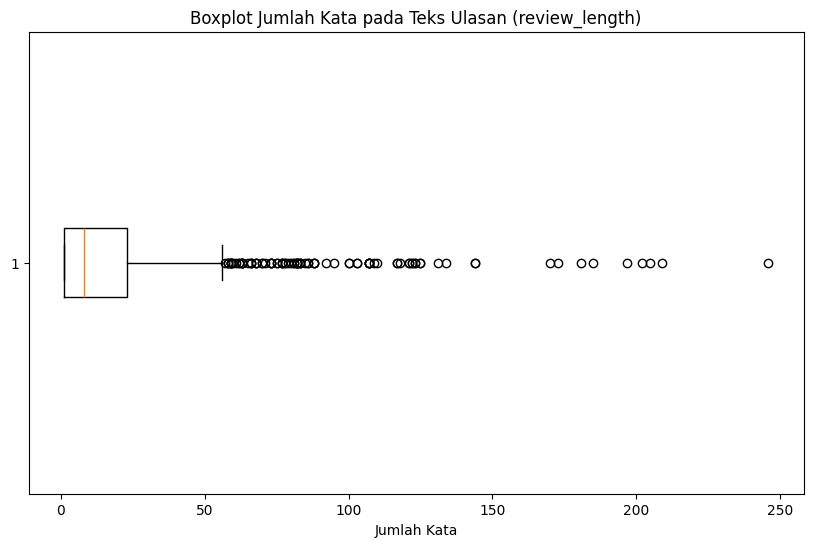

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

# 1. Mount Google Drive (gunakan force_remount jika diperlukan)
drive.mount('/content/drive', force_remount=False)

# 2. Tentukan path file dataset
input_path = '/content/drive/My Drive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv'

# 3. Baca dataset dengan penanganan error jika file tidak ditemukan
try:
    df = pd.read_csv(input_path)
except Exception as e:
    print(f"Error saat membaca file {input_path}: {e}")
    raise

print("Jumlah data sebelum analisis missing values:", len(df))

# 4. Analisis Missing Values (termasuk string kosong di kolom 'text')
missing_values = df.isnull().sum()
if 'text' in df.columns:
    empty_count = (df['text'].str.strip() == '').sum()
    missing_values['text'] += empty_count

missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print("\nAnalisis Missing Values per Kolom (termasuk string kosong pada kolom 'text'):")
print(missing_df)

# 4.1 Analisis Data Duplikat (umum, seluruh kolom)
duplicates_total = df.duplicated().sum()
print("\nJumlah data duplikat (seluruh kolom):", duplicates_total)
if 'text' in df.columns:
    condition = df.duplicated() & ((df['text'].isnull()) | (df['text'].str.strip() == ''))
    duplicates_empty_text = df[condition].shape[0]
    print("Jumlah data duplikat dengan text kosong/NaN:", duplicates_empty_text)

# 4.1.1 Analisis Duplikat Khusus Kolom 'text'
if 'text' in df.columns:
    duplicates_mask_text = df.duplicated(subset=['text'], keep=False)
    df_duplicates_text = df[duplicates_mask_text]
    print(f"\nJumlah baris duplikat (berdasarkan kolom 'text'): {len(df_duplicates_text)}")
    if len(df_duplicates_text) > 0:
        print("\nContoh baris duplikat (5 baris teratas) berdasarkan 'text':")
        print(df_duplicates_text.head(5))
    else:
        print("Tidak ada baris duplikat yang terdeteksi berdasarkan kolom 'text'.")
else:
    print("\nKolom 'text' tidak ditemukan, tidak dapat menganalisis duplikat berdasarkan 'text'.")

# 4.2 Konsistensi Tipe Data (Hanya 3 Kolom: publishedAtDate, stars, text)
print("\nInformasi Tipe Data (publishedAtDate, stars, text):")
cols_to_show = ['publishedAtDate', 'stars', 'text']
found_cols = [col for col in cols_to_show if col in df.columns]
if found_cols:
    print(df[found_cols].dtypes)
else:
    print("Tidak ada kolom (publishedAtDate, stars, text) yang ditemukan di dataset.")

# 4.3 Analisis Nilai Unik
kategori_columns = ['stars', 'publishedAtDate', 'text']
print("\nAnalisis Nilai Unik pada Kolom Tertentu:")
for col in kategori_columns:
    if col in df.columns:
        unique_values = df[col].unique()
        print(f"\nKolom '{col}' memiliki {len(unique_values)} nilai unik:")

# 4.4 Membuat Kolom 'review_length' (Jumlah Kata)
if 'text' in df.columns:
    df['review_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))
    print("\nDistribusi Panjang Review (Jumlah Kata):")
    review_length_bins = pd.cut(df['review_length'], bins=10)
    review_length_distribution = review_length_bins.value_counts().sort_index()
    print(review_length_distribution)

    # Tambahkan kode untuk melihat rata-rata word count
    mean_word_count = df['review_length'].mean()
    print("\nRata-rata Jumlah Kata pada Review:", mean_word_count)
else:
    print("\nKolom 'text' tidak ditemukan, tidak dapat membuat 'review_length'.")

# 4.5 Analisis Outlier pada Kolom Numerik (hanya 'review_length')
numerik_columns = ['review_length']
print("\nAnalisis Outlier pada Kolom Numerik (review_length):")
for col in numerik_columns:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"\nKolom '{col}':")
        print(f"  Q1          : {q1}")
        print(f"  Q3          : {q3}")
        print(f"  IQR         : {iqr}")
        print(f"  Batas Bawah : {lower_bound}")
        print(f"  Batas Atas  : {upper_bound}")
        print(f"  Jumlah Outlier: {outliers.count()}")
        if not outliers.empty:
            mean_outliers = outliers.mean()
            print(f"  Rata-rata Outlier: {mean_outliers}")
    else:
        print(f"\nKolom '{col}' tidak ditemukan di dataset.")

# Visualisasi: Boxplot untuk 'review_length'
plt.figure(figsize=(10, 6))
plt.boxplot(df['review_length'], vert=False)
plt.title("Boxplot Jumlah Kata pada Teks Ulasan (review_length)")
plt.xlabel("Jumlah Kata")
plt.show()


In [ ]:
import pandas as pd
from google.colab import drive

# 1. Mount Google Drive (gunakan force_remount jika diperlukan)
drive.mount('/content/drive', force_remount=False)

# 2. Tentukan path file dataset
input_path = '/content/drive/My Drive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv'

# 3. Baca dataset dengan penanganan error jika file tidak ditemukan
try:
    df = pd.read_csv(input_path)
except Exception as e:
    print(f"Error saat membaca file {input_path}: {e}")
    raise

print("Jumlah data sebelum analisis missing values:", len(df))

# 4. Analisis Missing Values (termasuk string kosong di kolom 'text')
missing_values = df.isnull().sum()
if 'text' in df.columns:
    empty_count = (df['text'].str.strip() == '').sum()
    missing_values['text'] += empty_count

missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
print("\nAnalisis Missing Values per Kolom (termasuk string kosong pada kolom 'text'):")
print(missing_df)

# 4.1 Analisis Data Duplikat (umum, seluruh kolom)
duplicates_total = df.duplicated().sum()
print("\nJumlah data duplikat (seluruh kolom):", duplicates_total)

# -- Tambahan: Menghitung data duplikat yang juga memiliki text kosong/NaN
if 'text' in df.columns:
    condition = df.duplicated() & ((df['text'].isnull()) | (df['text'].str.strip() == ''))
    duplicates_empty_text = df[condition].shape[0]
    print("Jumlah data duplikat dengan text kosong/NaN:", duplicates_empty_text)

# 4.1.1 Analisis Duplikat Khusus Kolom 'text'
if 'text' in df.columns:
    duplicates_mask_text = df.duplicated(subset=['text'], keep=False)
    df_duplicates_text = df[duplicates_mask_text]
    print(f"\nJumlah baris duplikat (berdasarkan kolom 'text'): {len(df_duplicates_text)}")

    # Tampilkan contoh baris duplikat
    if len(df_duplicates_text) > 0:
        print("\nContoh baris duplikat (5 baris teratas) berdasarkan 'text':")
        print(df_duplicates_text.head(5))
    else:
        print("Tidak ada baris duplikat yang terdeteksi berdasarkan kolom 'text'.")
else:
    print("\nKolom 'text' tidak ditemukan, tidak dapat menganalisis duplikat berdasarkan 'text'.")

# 4.2 Konsistensi Tipe Data (Hanya 3 Kolom: publishedAtDate, stars, text)
print("\nInformasi Tipe Data (publishedAtDate, stars, text):")
cols_to_show = ['publishedAtDate', 'stars', 'text']
found_cols = [col for col in cols_to_show if col in df.columns]

if found_cols:
    print(df[found_cols].dtypes)
else:
    print("Tidak ada kolom (publishedAtDate, stars, text) yang ditemukan di dataset.")

# 4.3 Analisis Nilai Unik
kategori_columns = ['stars', 'publishedAtDate', 'text']
print("\nAnalisis Nilai Unik pada Kolom Tertentu:")
for col in kategori_columns:
    if col in df.columns:
        unique_values = df[col].unique()
        print(f"\nKolom '{col}' memiliki {len(unique_values)} nilai unik:")


# 4.3.1 Membuat Kolom 'review_length' (Jumlah Kata)
if 'text' in df.columns:
    df['review_length'] = df['text'].astype(str).apply(lambda x: len(x.split()))
    print("\nDistribusi Panjang Review (Jumlah Kata):")
    review_length_bins = pd.cut(df['review_length'], bins=10)
    review_length_distribution = review_length_bins.value_counts().sort_index()
    print(review_length_distribution)
else:
    print("\nKolom 'text' tidak ditemukan, tidak dapat membuat 'review_length'.")

# 4.4 Analisis Outlier pada Kolom Numerik (hanya 'review_length')
numerik_columns = ['review_length']
print("\nAnalisis Outlier pada Kolom Numerik (review_length):")

for col in numerik_columns:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"\nKolom '{col}':")
        print(f"  Q1          : {q1}")
        print(f"  Q3          : {q3}")
        print(f"  IQR         : {iqr}")
        print(f"  Batas Bawah : {lower_bound}")
        print(f"  Batas Atas  : {upper_bound}")
        print(f"  Jumlah Outlier: {outliers.count()}")
    else:
        print(f"\nKolom '{col}' tidak ditemukan di dataset.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum analisis missing values: 1243

Analisis Missing Values per Kolom (termasuk string kosong pada kolom 'text'):
                Missing Values  Percentage (%)
address                      0        0.000000
categories/0                 0        0.000000
categoryName                 0        0.000000
cid                          0        0.000000
city                         0        0.000000
...                        ...             ...
text                       324       26.065969
textTranslated            1197       96.299276
title                        0        0.000000
totalScore                   0        0.000000
url                          0        0.000000

[68 rows x 2 columns]

Jumlah data duplikat (seluruh kolom): 0
Jumlah data duplikat dengan text kosong/NaN: 0

Jumlah baris duplikat (berdasarkan kolom 'text'): 353

Contoh bari

#Pemilihan Kolom dari Dataset

In [ ]:
# Import library yang diperlukan
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Tentukan path file CSV
file_path = '/content/drive/MyDrive/DATA/dataset_Google-Maps-Reviews-Scraper_2025-01-15_06-02-12-301.csv'

# Baca dataset dengan penanganan error
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error saat membaca file {file_path}: {e}")
    raise

# Tampilkan jumlah dan daftar kolom sebelum pemilihan
print("Jumlah kolom sebelum:", len(df.columns))
print("Kolom sebelum:", list(df.columns))

# Pilih hanya 3 kolom yang dianggap relevan
selected_columns = ['publishedAtDate', 'stars', 'text']

# Cek apakah semua kolom yang diinginkan ada dalam dataset
missing_columns = [col for col in selected_columns if col not in df.columns]
if missing_columns:
    print(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}")
else:
    df_selected = df[selected_columns]

    # Tampilkan jumlah dan daftar kolom setelah pemilihan
    print("\nJumlah kolom sesudah:", len(df_selected.columns))
    print("Kolom sesudah:", list(df_selected.columns))

    # Tampilkan 5 baris pertama untuk mengecek hasil
    print("\nDataset setelah pemilihan kolom:")
    print(df_selected.head())

    # Simpan hasil ke file baru jika diperlukan
    output_path = '/content/drive/MyDrive/DATA/processed_reviews.csv'
    df_selected.to_csv(output_path, index=False)
    print(f"\nData telah disimpan ke: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah kolom sebelum: 68
Kolom sebelum: ['address', 'categories/0', 'categoryName', 'cid', 'city', 'countryCode', 'fid', 'imageUrl', 'isAdvertisement', 'isLocalGuide', 'likesCount', 'location/lat', 'location/lng', 'name', 'neighborhood', 'permanentlyClosed', 'placeId', 'postalCode', 'price', 'publishAt', 'publishedAtDate', 'rating', 'responseFromOwnerDate', 'responseFromOwnerText', 'reviewId', 'reviewImageUrls/0', 'reviewImageUrls/1', 'reviewImageUrls/2', 'reviewImageUrls/3', 'reviewImageUrls/4', 'reviewImageUrls/5', 'reviewImageUrls/6', 'reviewImageUrls/7', 'reviewImageUrls/8', 'reviewImageUrls/9', 'reviewImageUrls/10', 'reviewImageUrls/11', 'reviewImageUrls/12', 'reviewImageUrls/13', 'reviewImageUrls/14', 'reviewImageUrls/15', 'reviewImageUrls/16', 'reviewImageUrls/17', 'reviewImageUrls/18', 'reviewImageUrls/19', 'reviewImageUrls/20', 'reviewImageUrls/21', 

#Validasi Data Duplikat dengan Normalisasi

In [ ]:
import pandas as pd
import re
from google.colab import drive

# Mount Google Drive (gunakan force_remount=True jika diperlukan)
drive.mount('/content/drive', force_remount=False)

# Tentukan path file dataset
input_path = '/content/drive/MyDrive/DATA/processed_reviews.csv'

# Baca dataset dengan penanganan error jika file tidak ditemukan
try:
    df = pd.read_csv(input_path)
except Exception as e:
    print(f"Error saat membaca file {input_path}: {e}")
    raise

print("Jumlah data sebelum normalisasi dan penghapusan duplikat:", len(df))

# Fungsi normalisasi teks: mengubah huruf kecil, menghapus tanda baca, dan menghilangkan spasi berlebih
def normalize_text(text):
    # Cek apakah nilai tersebut NaN atau bukan string
    if pd.isna(text) or not isinstance(text, str):
        return ""  # Mengembalikan string kosong untuk memastikan konsistensi
    # Ubah ke huruf kecil
    text = text.lower()
    # Hapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Terapkan normalisasi pada kolom 'text' jika kolom tersebut ada
if 'text' in df.columns:
    df['text'] = df['text'].apply(normalize_text)
else:
    print("Kolom 'text' tidak ditemukan di dataset.")

# Identifikasi baris yang merupakan duplikat (semua instance duplikat)
duplicate_mask = df.duplicated(subset=['text'], keep=False)
df_duplicates = df[duplicate_mask]

print("\nContoh data yang merupakan duplikat sebelum penghapusan:")
if not df_duplicates.empty:
    print(df_duplicates.head(5))
else:
    print("Tidak ditemukan data duplikat sebelum penghapusan.")

# Hapus duplikat berdasarkan kolom 'text' (menyisakan satu instance untuk tiap nilai yang sama)
df_no_duplicates = df.drop_duplicates(subset=['text'])
print("\nJumlah data setelah penghapusan duplikat:", len(df_no_duplicates))

# Ambil contoh baris unik (hasil penghapusan) untuk teks yang sebelumnya duplikat
duplicated_texts = df_duplicates['text'].unique()
df_duplicates_after = df_no_duplicates[df_no_duplicates['text'].isin(duplicated_texts)]

print("\nContoh data yang tersisa (unik) setelah penghapusan duplikat untuk teks duplikat:")
if not df_duplicates_after.empty:
    print(df_duplicates_after.head(5))
else:
    print("Tidak ditemukan data duplikat setelah penghapusan (karena sebelumnya tidak ada duplikat).")

# Simpan data tanpa duplikat ke file CSV baru
output_path = '/content/drive/MyDrive/DATA/clean_normalized_no_duplicates_reviews.csv'
try:
    df_no_duplicates.to_csv(output_path, index=False)
    print(f"\nData telah disimpan ke: {output_path}")
except Exception as e:
    print(f"Error saat menyimpan file ke {output_path}: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum normalisasi dan penghapusan duplikat: 1243

Contoh data yang merupakan duplikat sebelum penghapusan:
             publishedAtDate  stars  \
14  2024-12-27T12:07:18.840Z      5   
26  2024-12-07T06:01:39.842Z      5   
35  2024-11-27T11:09:52.436Z      4   
39  2024-11-24T13:49:27.844Z      5   
45  2024-11-16T03:34:02.813Z      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# Penanganan Missing Value

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# 2. Install modul langdetect jika belum terinstall
!pip install langdetect

# 3. Impor modul yang diperlukan
import re
import string
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Untuk konsistensi hasil deteksi

# 4. Fungsi untuk membersihkan teks sebelum pendeteksian bahasa
def clean_for_detection(text):
    if not isinstance(text, str):
        return ""
    return text.strip()

# 5. Fungsi pendeteksian bahasa yang diperbaiki
def detect_language_improved(text):
    try:
        cleaned_text = clean_for_detection(text)
        # Jika teks kosong atau sangat pendek, asumsikan sebagai bahasa Indonesia
        if len(cleaned_text) < 20:
            return "id"
        detected = detect(cleaned_text)
        # Jika terdeteksi "fi" (Finnish), periksa apakah terdapat kata umum bahasa Indonesia
        if detected == 'fi':
            common_indonesian = ["dan", "yang", "di", "ke", "dari", "ini", "itu", "untuk", "dengan", "tidak", "sangat", "ada", "saya", "kami"]
            tokens = cleaned_text.split()
            if any(word in tokens for word in common_indonesian):
                return "id"
        return detected
    except Exception:
        return "error"

# 6. Baca dataset dari file CSV
file_path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_no_outliers.csv'
df = pd.read_csv(file_path)
print("Jumlah total data:", df.shape[0])

# 7. Terapkan pendeteksian bahasa ke kolom 'text'
df['language'] = df['text'].apply(detect_language_improved)

# 8. Tampilkan distribusi bahasa
num_id = (df['language'] == 'id').sum()
num_non = df.shape[0] - num_id
print("Jumlah ulasan berbahasa Indonesia:", num_id)
print("Jumlah ulasan berbahasa non-Indonesia:", num_non)

# 9. Tampilkan contoh data yang terdeteksi sebagai non-Indonesia (sebelum filtering)
df_non = df[df['language'] != 'id']
print("\n==== Contoh data yang terdeteksi sebagai non-Indonesia (sebelum filtering) ====")
print(df_non[['text', 'language']].head(5))

# 10. Filter data: Hanya menyisakan ulasan berbahasa Indonesia
df_filtered = df[df['language'] == 'id'].copy()
print("\nJumlah data setelah filtering (hanya ulasan berbahasa Indonesia):", df_filtered.shape[0])

# 11. Tampilkan perbandingan baris yang sama sebelum dan sesudah filtering.
# Indeks yang diinginkan: [6, 7, 12, 21, 47]
desired_indices = [6, 7, 12, 21, 47]

# Buat mapping: untuk tiap desired index, jika tidak ada di df_filtered,
# maka ambil baris berikutnya yang tersedia (belum digunakan).
actual_indices = []
used = set()
available = sorted(df_filtered.index)
for d in desired_indices:
    if d in available and d not in used:
        actual_indices.append(d)
        used.add(d)
    else:
        # Cari kandidat terkecil pada df_filtered yang lebih besar dari d dan belum dipakai
        candidate = next((x for x in available if x > d and x not in used), None)
        if candidate is not None:
            actual_indices.append(candidate)
            used.add(candidate)
        else:
            # Jika tidak ada kandidat, gunakan baris terakhir yang tersedia (opsional)
            actual_indices.append(available[-1])
            used.add(available[-1])

# Buat DataFrame perbandingan:
df_before = df.loc[desired_indices, ['text', 'language']]
df_after = df_filtered.loc[actual_indices, ['text', 'language']].copy()
# Ganti indeks di df_after agar sama dengan desired_indices
df_after.index = desired_indices

print("\n==== Perbandingan data (baris yang sama) sebelum dan sesudah filtering ====")
print("Data asli (sebelum filtering) pada indeks:", desired_indices)
print(df_before)
print("\nData setelah filtering (hanya ulasan berbahasa Indonesia) pada indeks:", desired_indices)
print(df_after)

# 12. Simpan dataset hasil filtering ke file CSV baru
output_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian.csv'
df_filtered.to_csv(output_file, index=False)
print("\nDataset hasil filtering telah disimpan di:", output_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah total data: 804
Jumlah ulasan berbahasa Indonesia: 765
Jumlah ulasan berbahasa non-Indonesia: 39

==== Contoh data yang terdeteksi sebagai non-Indonesia (sebelum filtering) ====
                                                                                                                                                                                                                                 text  \
6                                                    had an amazing experience here in my internal medicine rotation it was a good healthcare environment and lots of interesting cases to study the doctors and staffs are very nice   
7   had an amazing experience here at rsud sleman for my ipd rotation the doctors and staff were incredibly supportive ensuring i gained handson experience in a wide range of ipd procedures but also incredibly warm and s

# Validasi Konsistensi Tipe Data

In [ ]:
import pandas as pd
from google.colab import drive
import os

# Mount Google Drive hanya jika belum ter-mount
if not os.path.isdir('/content/drive/MyDrive'):
    drive.mount('/content/drive')

# Path file CSV yang benar
file_path = '/content/drive/MyDrive/DATA/cleaned_reviews.csv'

# Membaca dataset
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error saat membaca file {file_path}: {e}")
    raise

# Menampilkan informasi dasar dari DataFrame
print("Informasi DataFrame:")
df.info()

print("\nTipe Data Setiap Kolom:")
print(df.dtypes)

# Validasi Konsistensi Tipe Data: Menampilkan tipe data dari sampel 5 baris pertama di setiap kolom
print("\nValidasi Konsistensi Tipe Data (contoh 5 baris pertama untuk setiap kolom):")
for col in df.columns:
    sample_types = df[col].head(5).apply(lambda x: type(x)).unique()
    print(f"Kolom '{col}': {sample_types}")

# Jika terdapat kolom yang diharapkan memiliki tipe data tertentu, lakukan konversi atau validasi.
# Contoh: Pastikan kolom 'rating' berupa numerik
if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    print("\nSetelah konversi, tipe data kolom 'rating':", df['rating'].dtype)

# Contoh: Pastikan kolom 'text' berupa string
if 'text' in df.columns:
    df['text'] = df['text'].astype(str)
    print("Setelah konversi, tipe data kolom 'text':", df['text'].dtype)

# Pemeriksaan tambahan: Hitung jumlah tipe data unik per kolom untuk mendeteksi inkonsistensi
print("\nPemeriksaan inkonsistensi tipe data (jumlah tipe unik per kolom):")
for col in df.columns:
    unique_types_count = df[col].apply(lambda x: type(x)).nunique()
    print(f"Kolom '{col}': {unique_types_count} tipe unik")

print("\nValidasi konsistensi tipe data selesai.")


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   publishedAtDate  883 non-null    object
 1   stars            883 non-null    int64 
 2   text             883 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.8+ KB

Tipe Data Setiap Kolom:
publishedAtDate    object
stars               int64
text               object
dtype: object

Validasi Konsistensi Tipe Data (contoh 5 baris pertama untuk setiap kolom):
Kolom 'publishedAtDate': [<class 'str'>]
Kolom 'stars': [<class 'int'>]
Kolom 'text': [<class 'str'>]
Setelah konversi, tipe data kolom 'text': object

Pemeriksaan inkonsistensi tipe data (jumlah tipe unik per kolom):
Kolom 'publishedAtDate': 1 tipe unik
Kolom 'stars': 1 tipe unik
Kolom 'text': 1 tipe unik

Validasi konsistensi tipe data selesai.


# Penghitungan Ulang Variabel Untuk Analisis Outlier dan Penghapusan Outlier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Statistik Deskriptif untuk word_count:
count    883.000000
mean      24.610419
std       30.281558
min        1.000000
25%        6.000000
50%       15.000000
75%       30.000000
max      246.000000
Name: word_count, dtype: float64

Batas bawah: -30.0, Batas atas: 66.0

Jumlah outlier pada word_count: 71
Rata-rata word_count setelah menghapus outlier: 17.472906403940886

Tabel Analisis Outlier pada Kolom 'word_count':
                              Parameter       Nilai
0                  Q1 (25th percentile)    6.000000
1                  Q3 (75th percentile)   30.000000
2                                   IQR   24.000000
3                           Lower Bound  -30.000000
4                           Upper Bound   66.000000
5                        Jumlah Outlier   71.000000
6                     Rata-rata Outlier  106.239437
7  Rata-rata Word Count (tanpa ou

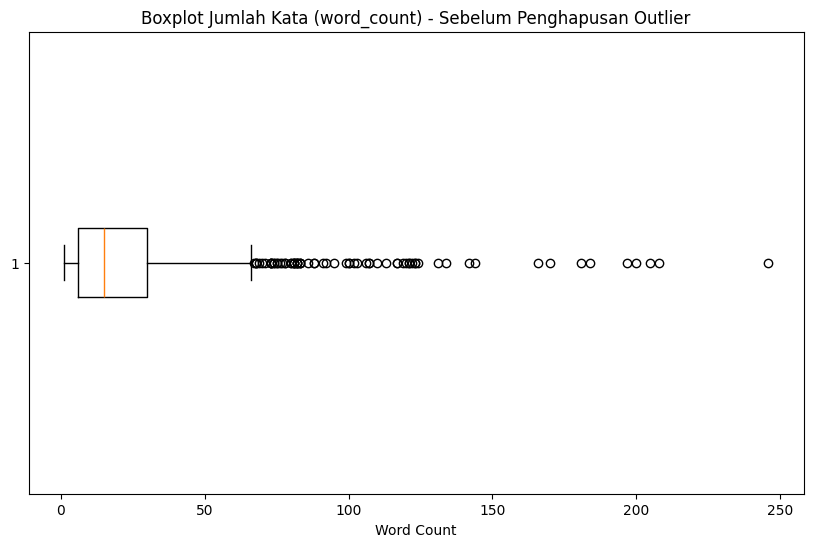


Boxplot sebelum penghapusan outlier berhasil disimpan di /content/drive/MyDrive/DATA/boxplot_word_count_before.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

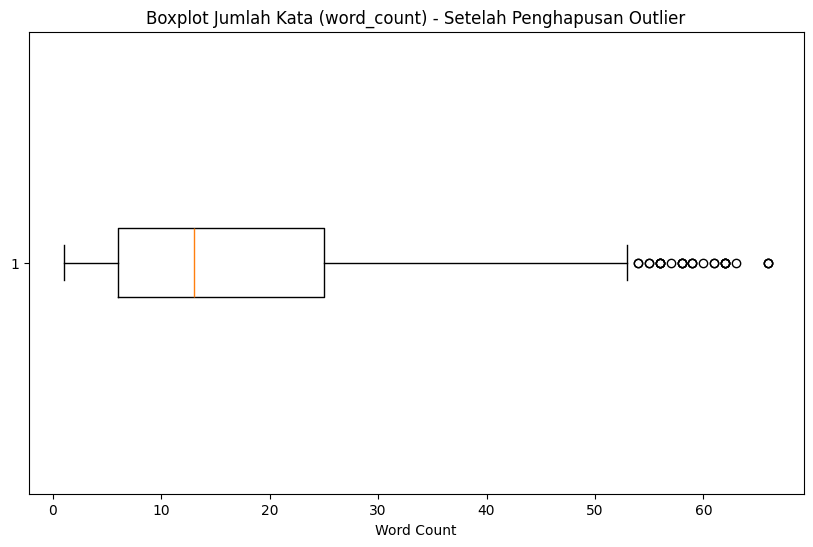


Boxplot setelah penghapusan outlier berhasil disimpan di /content/drive/MyDrive/DATA/boxplot_word_count_after.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')

# Path file CSV
file_path = '/content/drive/MyDrive/DATA/cleaned_reviews.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Buat variabel baru: word_count (jumlah kata pada kolom 'text')
df['word_count'] = df['text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Hitung statistik deskriptif untuk word_count
desc = df['word_count'].describe()
print("Statistik Deskriptif untuk word_count:")
print(desc)

# Penghitungan IQR untuk mendeteksi outlier berdasarkan word_count
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"\nBatas bawah: {lower_bound}, Batas atas: {upper_bound}")

# Identifikasi outlier berdasarkan word_count
outliers = df[(df['word_count'] < lower_bound) | (df['word_count'] > upper_bound)]
num_outliers = len(outliers)
if not outliers.empty:
    mean_outliers = outliers['word_count'].mean()
else:
    mean_outliers = np.nan

# Filter data tanpa outlier (data setelah penghapusan outlier)
df_no_outliers = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]
mean_no_outliers = df_no_outliers['word_count'].mean()

print("\nJumlah outlier pada word_count:", num_outliers)
print("Rata-rata word_count setelah menghapus outlier:", mean_no_outliers)

# Buat tabel yang menampilkan data setelah penghapusan outlier
tabel_outlier = pd.DataFrame({
    "Parameter": [
        "Q1 (25th percentile)",
        "Q3 (75th percentile)",
        "IQR",
        "Lower Bound",
        "Upper Bound",
        "Jumlah Outlier",
        "Rata-rata Outlier",
        "Rata-rata Word Count (tanpa outlier)"
    ],
    "Nilai": [
        Q1,
        Q3,
        IQR,
        lower_bound,
        upper_bound,
        num_outliers,
        mean_outliers,
        mean_no_outliers
    ]
})

print("\nTabel Analisis Outlier pada Kolom 'word_count':")
print(tabel_outlier)

# Simpan data tanpa outlier ke file CSV baru
output_file_path = '/content/drive/MyDrive/DATA/cleaned_reviews_no_outliers.csv'
df_no_outliers.to_csv(output_file_path, index=False)
print(f"\nData tanpa outlier berhasil disimpan di {output_file_path}")

# Visualisasi: Boxplot untuk 'word_count' pada data sebelum penghapusan outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df['word_count'], vert=False)
plt.title("Boxplot Jumlah Kata (word_count) - Sebelum Penghapusan Outlier")
plt.xlabel("Word Count")
plot_before = '/content/drive/MyDrive/DATA/boxplot_word_count_before.png'
plt.savefig(plot_before, bbox_inches='tight')
plt.show()
print(f"\nBoxplot sebelum penghapusan outlier berhasil disimpan di {plot_before}")
files.download(plot_before)

# Visualisasi: Boxplot untuk 'word_count' pada data setelah penghapusan outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['word_count'], vert=False)
plt.title("Boxplot Jumlah Kata (word_count) - Setelah Penghapusan Outlier")
plt.xlabel("Word Count")
plot_after = '/content/drive/MyDrive/DATA/boxplot_word_count_after.png'
plt.savefig(plot_after, bbox_inches='tight')
plt.show()
print(f"\nBoxplot setelah penghapusan outlier berhasil disimpan di {plot_after}")
files.download(plot_after)


#Penyaringan Ulasan Berdasarkan Periode Waktu

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data sebelum proses: 812

Periode waktu yang diambil:
Dari: 2016-10-04 08:16:25.726000+00:00
Sampai: 2024-12-31 00:00:00+00:00

Jumlah data:
Total data sebelum filter waktu: 812
Total data setelah filter waktu: 804
Jumlah data yang difilter: 8
Persentase data terfilter: 1.0%

Data telah disimpan ke: /content/drive/MyDrive/DATA/filtered_dataset_until_2024_no_outliers.csv


<ipython-input-40-76af2588d3a8>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['publishedAtDate'].dt.year


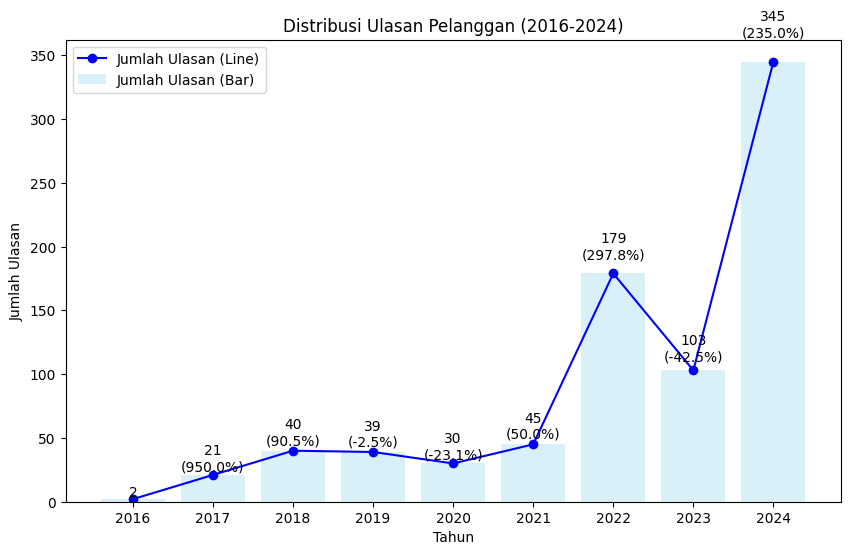


Gambar berhasil disimpan di /content/drive/MyDrive/DATA/distribusi_ulasan_2016_2024.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from google.colab import files

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Baca dataset dari file CSV
input_path = '/content/drive/MyDrive/DATA/cleaned_reviews_no_outliers.csv'
try:
    df = pd.read_csv(input_path)
except Exception as e:
    print(f"Error saat membaca file {input_path}: {e}")
    raise

print("Jumlah data sebelum proses:", len(df))

# 3. Konversi kolom 'publishedAtDate' ke datetime (tz-aware) dengan UTC
if 'publishedAtDate' in df.columns:
    try:
        df['publishedAtDate'] = pd.to_datetime(df['publishedAtDate'], utc=True, errors='coerce')
    except Exception as e:
        print(f"Error saat konversi 'publishedAtDate': {e}")
        raise
else:
    print("Kolom 'publishedAtDate' tidak ditemukan dalam dataset.")
    df['publishedAtDate'] = pd.NaT

# 4. Penyaringan Ulasan Berdasarkan Periode Waktu
end_date = pd.to_datetime('2024-12-31').tz_localize('UTC')
df_filtered = df[df['publishedAtDate'] <= end_date]

print("\nPeriode waktu yang diambil:")
if not df_filtered.empty:
    print(f"Dari: {df_filtered['publishedAtDate'].min()}")
else:
    print("Data kosong setelah filter periode!")
print(f"Sampai: {end_date}")

print("\nJumlah data:")
print(f"Total data sebelum filter waktu: {len(df)}")
print(f"Total data setelah filter waktu: {len(df_filtered)}")
print(f"Jumlah data yang difilter: {len(df) - len(df_filtered)}")
print(f"Persentase data terfilter: {((len(df) - len(df_filtered)) / len(df) * 100):.1f}%")

# 5. Simpan dataset hasil filtering ke file baru
output_path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_no_outliers.csv'
try:
    df_filtered.to_csv(output_path, index=False)
    print("\nData telah disimpan ke:", output_path)
except Exception as e:
    print(f"Error saat menyimpan file ke {output_path}: {e}")

# === BAGIAN TAMBAHAN: MEMBUAT GRAFIK DISTRIBUSI ULASAN TAHUNAN (2016-2024) ===

if len(df_filtered) == 0:
    print("\nTidak ada data untuk membuat grafik.")
else:
    # Tambahkan kolom 'year' untuk mempermudah grouping
    df_filtered['year'] = df_filtered['publishedAtDate'].dt.year

    # Hitung jumlah ulasan per tahun
    year_counts = df_filtered['year'].value_counts().sort_index()

    # Pastikan hanya menampilkan tahun 2016 s/d 2024 (sesuai konteks)
    valid_years = [y for y in year_counts.index if 2016 <= y <= 2024]
    year_counts = year_counts[valid_years]

    if len(year_counts) == 0:
        print("\nTidak ada data tahun 2016-2024 setelah filter.")
    else:
        # Plot: Bar chart (transparan) dan Line chart
        plt.figure(figsize=(10, 6))
        plt.bar(year_counts.index, year_counts.values, alpha=0.3, color='skyblue', label='Jumlah Ulasan (Bar)')
        plt.plot(year_counts.index, year_counts.values, marker='o', color='blue', label='Jumlah Ulasan (Line)')

        # Tambahkan label persentase kenaikan/turunan (Year over Year) di atas tiap bar
        for i in range(len(year_counts)):
            curr_val = year_counts.values[i]
            curr_year = year_counts.index[i]
            if i == 0:
                plt.text(curr_year, curr_val + (0.05 * curr_val),
                         f"{curr_val}",
                         ha='center', va='bottom', fontsize=10, color='black')
            else:
                prev_val = year_counts.values[i-1]
                if prev_val != 0:
                    yoy_change = ((curr_val - prev_val) / prev_val) * 100
                    yoy_label = f"{curr_val}\n({yoy_change:.1f}%)"
                else:
                    yoy_label = f"{curr_val}"
                plt.text(curr_year, curr_val + (0.05 * curr_val),
                         yoy_label,
                         ha='center', va='bottom', fontsize=10, color='black')

        plt.title("Distribusi Ulasan Pelanggan (2016-2024)")
        plt.xlabel("Tahun")
        plt.ylabel("Jumlah Ulasan")
        plt.xticks(year_counts.index)
        plt.legend()

        # Simpan dan download grafik
        plot_file = '/content/drive/MyDrive/DATA/distribusi_ulasan_2016_2024.png'
        plt.savefig(plot_file, bbox_inches='tight')
        plt.show()

        print(f"\nGambar berhasil disimpan di {plot_file}")
        files.download(plot_file)


#Preprocessing Data

In [ ]:
import os
import pandas as pd
from google.colab import drive

# Cek apakah drive sudah ter-mount, jika belum, maka mount
if not os.path.isdir('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("Google Drive sudah ter-mount.")

# Ganti path sesuai lokasi file Anda di Google Drive
df = pd.read_csv('/content/drive/MyDrive/DATA/filtered_dataset_until_2024_no_outliers.csv')

# Tampilkan 5 baris pertama sebagai cek
print(df.head())


Mounted at /content/drive
                    publishedAtDate  stars  \
0  2024-12-28 03:55:03.335000+00:00      5   
1  2024-12-28 03:54:55.115000+00:00      5   
2  2024-12-28 03:53:38.376000+00:00      5   
3  2024-12-28 02:54:05.789000+00:00      4   
4  2024-12-25 07:50:14.265000+00:00      2   

                                                text  word_count  
0  koas di sleman sangat seru dan menyenangkan bi...          11  
1  pengalaman saya di rsud sleman benarbenar luar...          51  
2  koas di rsud sleman sangat seru banyak ilmu ya...          26  
3  pelayanannya bagus hanya kurang liftnya kalau ...          30  
4  pergi berobat antar istriku istri ku hampir pi...          49  


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Tentukan path file CSV
file_path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_no_outliers.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Tampilkan daftar kolom yang ada di file
print("Kolom-kolom yang ada dalam file:")
print(df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kolom-kolom yang ada dalam file:
['publishedAtDate', 'stars', 'text', 'word_count']


# PPD-1. Hapus Ulasan Berbahasa Inggris

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# 2. Install modul langdetect jika belum terinstall
!pip install langdetect

# 3. Impor modul yang diperlukan
import re
import string
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Untuk konsistensi hasil deteksi

# 4. Fungsi untuk membersihkan teks sebelum pendeteksian bahasa
def clean_for_detection(text):
    if not isinstance(text, str):
        return ""
    return text.strip()

# 5. Fungsi pendeteksian bahasa yang diperbaiki
def detect_language_improved(text):
    try:
        cleaned_text = clean_for_detection(text)
        # Jika teks kosong atau sangat pendek, asumsikan sebagai bahasa Indonesia
        if len(cleaned_text) < 20:
            return "id"
        detected = detect(cleaned_text)
        # Jika terdeteksi "fi" (Finnish), periksa apakah terdapat kata umum bahasa Indonesia
        if detected == 'fi':
            common_indonesian = ["dan", "yang", "di", "ke", "dari", "ini", "itu", "untuk", "dengan", "tidak", "sangat", "ada", "saya", "kami"]
            tokens = cleaned_text.split()
            if any(word in tokens for word in common_indonesian):
                return "id"
        return detected
    except Exception:
        return "error"

# 6. Baca dataset dari file CSV
file_path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_no_outliers.csv'
df = pd.read_csv(file_path)
print("Jumlah total data:", df.shape[0])

# 7. Terapkan pendeteksian bahasa ke kolom 'text'
df['language'] = df['text'].apply(detect_language_improved)

# 8. Tampilkan distribusi bahasa
num_id = (df['language'] == 'id').sum()
num_non = df.shape[0] - num_id
print("Jumlah ulasan berbahasa Indonesia:", num_id)
print("Jumlah ulasan berbahasa non-Indonesia:", num_non)

# 9. Tampilkan contoh data yang terdeteksi sebagai non-Indonesia (sebelum filtering)
df_non = df[df['language'] != 'id']
print("\n==== Contoh data yang terdeteksi sebagai non-Indonesia (sebelum filtering) ====")
print(df_non[['text', 'language']].head(5))

# 10. Filter data: Hanya menyisakan ulasan berbahasa Indonesia
df_filtered = df[df['language'] == 'id'].copy()
print("\nJumlah data setelah filtering (hanya ulasan berbahasa Indonesia):", df_filtered.shape[0])

# 11. Tampilkan perbandingan baris yang sama sebelum dan sesudah filtering.
# Indeks yang diinginkan: [6, 7, 12, 21, 47]
desired_indices = [6, 7, 12, 21, 47]

# Buat mapping: untuk tiap desired index, jika tidak ada di df_filtered,
# maka ambil baris berikutnya yang tersedia (belum digunakan).
actual_indices = []
used = set()
available = sorted(df_filtered.index)
for d in desired_indices:
    if d in available and d not in used:
        actual_indices.append(d)
        used.add(d)
    else:
        # Cari kandidat terkecil pada df_filtered yang lebih besar dari d dan belum dipakai
        candidate = next((x for x in available if x > d and x not in used), None)
        if candidate is not None:
            actual_indices.append(candidate)
            used.add(candidate)
        else:
            # Jika tidak ada kandidat, gunakan baris terakhir yang tersedia (opsional)
            actual_indices.append(available[-1])
            used.add(available[-1])

# Buat DataFrame perbandingan:
df_before = df.loc[desired_indices, ['text', 'language']]
df_after = df_filtered.loc[actual_indices, ['text', 'language']].copy()
# Ganti indeks di df_after agar sama dengan desired_indices
df_after.index = desired_indices

print("\n==== Perbandingan data (baris yang sama) sebelum dan sesudah filtering ====")
print("Data asli (sebelum filtering) pada indeks:", desired_indices)
print(df_before)
print("\nData setelah filtering (hanya ulasan berbahasa Indonesia) pada indeks:", desired_indices)
print(df_after)

# 12. Simpan dataset hasil filtering ke file CSV baru
output_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian.csv'
df_filtered.to_csv(output_file, index=False)
print("\nDataset hasil filtering telah disimpan di:", output_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=52d78def26dc8b64305af656d756ccd658c4d1cfb7d59d0be60d336dfcf75fe4
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Jumlah total data: 804
Jumlah ulasan berbahasa Indonesia: 765
Jumlah ulasan berbahasa non-Indonesia: 39

==== Contoh data yang terdeteksi sebagai non-Indonesia (sebelum filtering) ====
                                                 text language
6   had an amazing experience here in my internal ...       en
7   had an amazing experience here at rsud sleman ...       en
12                            rsud sleman is the best       en
21  had an ama

# PPD-2. Hapus URL

In [ ]:
import pandas as pd
import re

# Tentukan path file input dan output
input_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian.csv'
output_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_no_url.csv'

# Membaca dataset
df = pd.read_csv(input_file)

# Pola regex untuk mendeteksi URL
url_pattern = r'http\S+|www\.\S+'

# Mengecek baris yang mengandung URL pada kolom 'text'
contains_url = df['text'].astype(str).str.contains(url_pattern, regex=True)
print("Jumlah baris yang mengandung URL:", contains_url.sum())

# Menampilkan beberapa baris yang mengandung URL (jika ada)
df_url = df[contains_url]
if not df_url.empty:
    print("\nContoh beberapa baris sebelum penghapusan URL:")
    print(df_url[['text']].head())
else:
    print("\nTidak ditemukan baris yang mengandung URL pada kolom 'text'.")

# Fungsi untuk menghapus URL
def remove_url(text):
    return re.sub(url_pattern, '', text)

# Terapkan fungsi penghapusan URL pada kolom 'text' dan simpan kembali hasilnya di kolom 'text'
df['text'] = df['text'].apply(lambda x: remove_url(x) if isinstance(x, str) else x)

# Menampilkan contoh beberapa baris setelah penghapusan URL
if not df_url.empty:
    print("\nContoh beberapa baris setelah penghapusan URL:")
    print(df.loc[contains_url, ['text']].head())

# Simpan dataset yang telah dimodifikasi ke file CSV baru
df.to_csv(output_file, index=False)
print("\nFile baru telah disimpan di:", output_file)


Jumlah baris yang mengandung URL: 0

Tidak ditemukan baris yang mengandung URL pada kolom 'text'.

File baru telah disimpan di: /content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_no_url.csv


# PPD-3. Hapus Emoji

In [ ]:
import pandas as pd
import re

# Setting display agar teks tidak dipotong
pd.set_option('display.max_colwidth', None)

# Tentukan path file input dan output
input_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_no_url.csv'
output_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_no_url_no_emoji.csv'

# Membaca dataset
df = pd.read_csv(input_file)

# Regex pattern untuk mendeteksi emoji
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # Emoticons
    u"\U0001F300-\U0001F5FF"  # Simbol & pictographs
    u"\U0001F680-\U0001F6FF"  # Simbol transportasi & peta
    u"\U0001F1E0-\U0001F1FF"  # Bendera (iOS)
    "]+", flags=re.UNICODE)

# Fungsi untuk menghapus emoji dari teks
def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

# Mengecek baris yang mengandung emoji pada kolom 'text'
contains_emoji = df['text'].astype(str).apply(lambda x: bool(emoji_pattern.search(x)))
df_emoji = df[contains_emoji]

print("Contoh baris lengkap yang mengandung emoji (sebelum dan sesudah penghapusan):\n")
if not df_emoji.empty:
    # Tampilkan contoh baris secara lengkap dari kolom 'text'
    for index, row in df_emoji[['text']].head().iterrows():
        original_text = row['text']
        cleaned_text = remove_emoji(original_text)
        print(f"Baris {index} - Sebelum:\n{original_text}")
        print(f"Baris {index} - Sesudah:\n{cleaned_text}")
        print("-" * 80)
else:
    print("Tidak ditemukan baris yang mengandung emoji pada kolom 'text'.")

# Terapkan fungsi penghapusan emoji pada kolom 'text' dan simpan kembali hasilnya ke kolom 'text'
df['text'] = df['text'].apply(lambda x: remove_emoji(x) if isinstance(x, str) else x)

# Simpan dataset yang telah dimodifikasi ke file CSV baru
df.to_csv(output_file, index=False)
print("\nFile baru telah disimpan di:", output_file)


Contoh baris lengkap yang mengandung emoji (sebelum dan sesudah penghapusan):

Tidak ditemukan baris yang mengandung emoji pada kolom 'text'.

File baru telah disimpan di: /content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_no_url_no_emoji.csv


# PPD-4. Hapus Karakter Khusus dan Angka

In [ ]:
import pandas as pd
import re

# Setting agar tampilan teks tidak dipotong
pd.set_option('display.max_colwidth', None)

# Tentukan path file input dan output
input_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_no_url_no_emoji.csv'
output_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_cleaned.csv'

# Membaca dataset
df = pd.read_csv(input_file)

# Fungsi untuk menghapus karakter khusus dan angka
def remove_special_and_numbers(text):
    # Hapus semua karakter yang bukan huruf (a-z, A-Z) dan spasi
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Hilangkan spasi berlebih
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Simpan salinan sementara dari kolom 'text' untuk perbandingan (tidak disimpan sebagai kolom baru di DataFrame)
original_text = df['text'].copy()

# Terapkan fungsi ke kolom 'text' dan simpan hasilnya kembali ke kolom 'text'
df['text'] = df['text'].apply(lambda x: remove_special_and_numbers(x) if isinstance(x, str) else x)

# Tampilkan contoh perbandingan sebelum dan sesudah proses pada baris yang mengalami perubahan
print("Contoh perbandingan sebelum dan sesudah penghapusan karakter khusus dan angka:\n")
diff_rows = df[original_text != df['text']]
for index, row in diff_rows[['text']].head().iterrows():
    print(f"Baris {index} - Sebelum:\n{original_text.loc[index]}")
    print(f"Baris {index} - Sesudah:\n{row['text']}")
    print("-" * 80)

# Simpan dataset yang telah dimodifikasi ke file CSV baru
df.to_csv(output_file, index=False)
print("\nFile baru telah disimpan di:", output_file)


Contoh perbandingan sebelum dan sesudah penghapusan karakter khusus dan angka:

Baris 1 - Sebelum:
pengalaman saya di rsud sleman benarbenar luar biasalayanan yang diberikan sangat profesional dan penuh perhatian semua staf mulai dari dokter hingga perawat sangat ramah dan membantu membuat suasana menjadi lebih nyaman fasilitasnya pun sangat lengkap dan memadai sehingga memberikan rasa percaya diri kepada pasien dan keluarganya sungguh pengalaman 1010 sotonya enak
Baris 1 - Sesudah:
pengalaman saya di rsud sleman benarbenar luar biasalayanan yang diberikan sangat profesional dan penuh perhatian semua staf mulai dari dokter hingga perawat sangat ramah dan membantu membuat suasana menjadi lebih nyaman fasilitasnya pun sangat lengkap dan memadai sehingga memberikan rasa percaya diri kepada pasien dan keluarganya sungguh pengalaman sotonya enak
--------------------------------------------------------------------------------
Baris 3 - Sebelum:
pelayanannya bagus hanya kurang liftnya kalau d

# PPD-5. Hapus Spasi Berlebih

In [ ]:
import pandas as pd
import re

# Tentukan path file input dan output
input_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_cleaned.csv'
output_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_cleaned_no_extra_spaces.csv'

# Membaca dataset
df = pd.read_csv(input_file)

# Setting agar tampilan teks tidak dipotong
pd.set_option('display.max_colwidth', None)

# Fungsi untuk menghapus spasi berlebih
def remove_extra_spaces(text):
    if isinstance(text, str):
        # Ganti satu atau lebih spasi dengan satu spasi, kemudian hilangkan spasi di awal dan akhir
        return re.sub(r'\s+', ' ', text).strip()
    return text

# Fungsi untuk mengecek apakah teks mengandung spasi berlebih (dua atau lebih spasi berturut-turut)
def has_extra_spaces(text):
    if isinstance(text, str):
        return bool(re.search(r'\s{2,}', text))
    return False

# Identifikasi baris yang mengandung spasi berlebih pada kolom 'text' sebelum pembersihan
rows_with_extra_spaces = df[df['text'].astype(str).apply(has_extra_spaces)]

if rows_with_extra_spaces.empty:
    print("Tidak ada baris data dengan spasi berlebih.")
else:
    print("Contoh baris dengan spasi berlebih sebelum proses:")
    for index, row in rows_with_extra_spaces[['text']].head().iterrows():
        print(f"Baris {index} - Sebelum:\n{row['text']}")
        print("-" * 80)

# Terapkan fungsi untuk menghapus spasi berlebih pada kolom 'text' dan simpan hasilnya kembali ke kolom 'text'
df['text'] = df['text'].apply(lambda x: remove_extra_spaces(x) if isinstance(x, str) else x)

# Jika sebelumnya terdapat baris dengan spasi berlebih, tampilkan contoh perbandingan setelah pembersihan
if not rows_with_extra_spaces.empty:
    print("\nContoh baris dengan spasi berlebih setelah proses:")
    for index, row in df.loc[rows_with_extra_spaces.index, ['text']].head().iterrows():
        print(f"Baris {index} - Sesudah:\n{row['text']}")
        print("-" * 80)

# Simpan dataset yang telah dimodifikasi ke file CSV baru
df.to_csv(output_file, index=False)
print("\nFile baru telah disimpan di:", output_file)


Tidak ada baris data dengan spasi berlebih.

File baru telah disimpan di: /content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_cleaned_no_extra_spaces.csv


# PPD-6. Normalisasi Kata Tidak Baku

In [ ]:
import pandas as pd
import re

# Tentukan path file input dan output
input_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_cleaned_no_extra_spaces.csv'
output_file = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_normalized.csv'

# Membaca dataset
df = pd.read_csv(input_file)

# Kamus untuk normalisasi kata tidak baku (tidak termasuk 'dr' karena ambigu)
normalization_dict = {
    "nggak": "tidak",
    "ngak": "tidak",   # mapping tambahan untuk hasil reduksi "nggak" menjadi "ngak"
    "gak": "tidak",
    "tdk": "tidak",
    "blm": "belum",
    "dg": "dengan",
    "dgn": "dengan",
    "yg": "yang",
    "klo": "kalau",
    "krn": "karena",
    "krna": "karena",
    "aja": "saja",
    "pdhal": "padahal",
    "pdhl": "padahal",
    "utk": "untuk",
    "tgl": "tanggal",
    "wong": "orang",
    "sy": "saya",
    "rame": "ramai",
    "pnykt": "penyakit",
    "dlm": "dalam",
    "cpt": "cepat",
    "msh": "masih",
    "gtu": "begitu",
    "dah": "sudah",
    "dpt": "dapat",
    "srt": "surat",
    "ga": "tidak",
    "tau": "tahu",
    "pesen": "pesan",
    "bener": "benar",
    "nungguin": "nunggu",
    "ditanyain": "ditanya",
    "doang": "saja",
    "jd": "jadi",
    "doang": "saja",
    "uwauw": "wow"
}

# Fungsi untuk disambiguasi token 'dr'
def disambiguate_dr(tokens, index):
    # Jika token berikutnya adalah salah satu nama khusus, misal: okta, yogi, ahkob,
    # maka 'dr' diartikan sebagai "dokter", jika tidak, diartikan sebagai "dari".
    if index + 1 < len(tokens) and tokens[index+1] in {"okta", "yogi", "ahkob"}:
        return "dokter"
    else:
        return "dari"

# Fungsi normalisasi pada teks dengan penghilangan karakter berlebih
def normalize_text(text):
    if not isinstance(text, str):
        return text
    # Catatan: Tidak melakukan lower case karena sudah dilakukan sebelumnya
    # Hilangkan karakter berlebih:
    # Jika ada 3 atau lebih kemunculan karakter yang sama, reduksi menjadi satu (misalnya, "ajaaa" -> "aja")
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Tokenisasi sederhana: pisahkan berdasarkan spasi
    tokens = text.split()
    normalized_tokens = []
    for i, token in enumerate(tokens):
        if token == "dr":
            normalized_tokens.append(disambiguate_dr(tokens, i))
        elif token in normalization_dict:
            normalized_tokens.append(normalization_dict[token])
        else:
            normalized_tokens.append(token)
    return " ".join(normalized_tokens)

# Simpan salinan sementara dari kolom 'text' untuk perbandingan
original_text = df['text'].copy()

# Terapkan fungsi normalisasi pada kolom 'text' dan simpan kembali hasilnya di kolom 'text'
df['text'] = df['text'].apply(normalize_text)

# Tampilkan contoh perbandingan baris yang mengandung kata tidak baku (jika ada)
non_standard_rows = df[original_text.astype(str).apply(
    lambda x: any(token in normalization_dict or token == "dr" for token in x.split())
)]

if non_standard_rows.empty:
    print("Tidak ada baris dengan kata tidak baku yang ditemukan.")
else:
    print("Contoh perbandingan sebelum dan sesudah normalisasi:\n")
    for index, row in non_standard_rows[['text']].head().iterrows():
        print(f"Baris {index} - Sebelum Normalisasi:\n{original_text.loc[index]}")
        print(f"Baris {index} - Setelah Normalisasi:\n{row['text']}")
        print("-" * 80)

# Simpan dataset hasil normalisasi ke file CSV baru
df.to_csv(output_file, index=False)
print("\nFile baru telah disimpan di:", output_file)


Contoh perbandingan sebelum dan sesudah normalisasi:

Baris 4 - Sebelum Normalisasi:
pergi berobat antar istriku istri ku hampir pingsan ketika disuruh foto ronsen paru paru aku mau pinjam kursi roda nggak boleh sama satpam disana padahal kursi ada katanya satpam kursi rodanya udah ada yg pesenla wong yg pesen blm datangkokini pasien mau pingsan pinjam kursi roda ada nggak boleh
Baris 4 - Setelah Normalisasi:
pergi berobat antar istriku istri ku hampir pingsan ketika disuruh foto ronsen paru paru aku mau pinjam kursi roda tidak boleh sama satpam disana padahal kursi ada katanya satpam kursi rodanya udah ada yang pesenla orang yang pesan belum datangkokini pasien mau pingsan pinjam kursi roda ada tidak boleh
--------------------------------------------------------------------------------
Baris 15 - Sebelum Normalisasi:
dokter igd ada beberapa yg tidak rekomended pasien cuma di biarin ajaa pdhal diare dan asam lambung fatal
Baris 15 - Setelah Normalisasi:
dokter igd ada beberapa yang tid

# Pelabelan Data

In [ ]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from google.colab import drive

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Kamus sentimen yang diperluas (pastikan setiap kata memiliki polaritas yang sesuai)
sentiment_dict = {
    'bagus': 1,
    'baik': 1,
    'memuaskan': 2,
    'cepat': 1,
    'buruk': -2,
    'lambat': -1,
    'jelek': -2,
    'menyedihkan': -3,
    'menakutkan': -3,
    'senang': 2,
    'mantap': 2,
    'hebat': 2,
    'terbaik': 2,
    'cemerlang': 2,
    'kecewa': -3,
    'mengecewakan': -4,
    'sakit': -2,
    'nyeri': -2,
    'lapar': -1,
    'putus': -1,
    'mengganggu': -2,
    'kurang': -2,
    'lama': -3
}

def calculate_sentiment_score(text):
    """
    Menghitung sentiment score berdasarkan kata-kata dalam teks, dengan penanganan negasi.
    Jika tokenisasi gagal, fallback ke wordpunct_tokenize (pesan hanya muncul sekali).
    """
    text = str(text).lower()
    score = 0
    negation_words = ['tidak', 'belum', 'bukan']
    try:
        words = word_tokenize(text)
        if not words:
            words = text.split()
    except LookupError:
        if not hasattr(calculate_sentiment_score, "printed_warning"):
            print("LookupError pada word_tokenize di calculate_sentiment_score. Menggunakan wordpunct_tokenize sebagai fallback.")
            calculate_sentiment_score.printed_warning = True
        words = wordpunct_tokenize(text)
        if not words:
            words = text.split()
    negate = False
    for word in words:
        if word in negation_words:
            negate = True
            continue
        if word in sentiment_dict:
            current_score = sentiment_dict[word]
            score += -current_score if negate else current_score
            negate = False
    return score

def calculate_risk_score(text):
    """
    Menghitung risk score dengan mengurangi poin untuk istilah risiko.
    Menggunakan regex dengan word boundaries agar pencocokan tepat.
    """
    text = str(text).lower()
    score = 0
    high_risk = ['meninggal', 'kritis', 'darurat', 'fatal', 'pingsan', 'drop',
                 'mati', 'gagal', 'emergency', 'gawat', 'parah', 'koma']
    medium_risk = ['lama sekali', 'sangat lama', 'tidak ramah', 'komplain', 'kecewa',
                   'sangat buruk', 'sangat jelek', 'tidak professional', 'tidak becus',
                   'tidak kompeten', 'sangat kecewa']
    low_risk = ['antri', 'tunggu', 'kurang', 'lama', 'agak lama', 'sedikit lama',
                'kurang ramah', 'kurang bersih', 'kurang nyaman']
    for term in high_risk:
        if re.search(r'\b' + re.escape(term) + r'\b', text):
            score -= 5
    for term in medium_risk:
        if re.search(r'\b' + re.escape(term) + r'\b', text):
            score -= 3
    for term in low_risk:
        if re.search(r'\b' + re.escape(term) + r'\b', text):
            score -= 1
    return score

def calculate_total_score(sentiment, risk):
    """
    Jika terdapat indikasi risiko (risk < 0), total_score = risk - abs(sentiment).
    Jika tidak (risk >= 0), total_score = sentiment.
    """
    if risk < 0:
        return risk - abs(sentiment)
    else:
        return sentiment

def classify_risk(total_score):
    """
    Mengklasifikasikan ulasan berdasarkan total_score:
      - total_score >= 0         : Bukan Keluhan
      - -3 <= total_score < 0    : Keluhan Risiko Rendah
      - -7 <= total_score < -3   : Keluhan Risiko Tinggi
      - total_score < -7         : Keluhan Risiko Ekstrim
    """
    if total_score >= 0:
        return 'Bukan Keluhan'
    elif total_score >= -3:
        return 'Keluhan Risiko Rendah'
    elif total_score >= -7:
        return 'Keluhan Risiko Tinggi'
    else:
        return 'Keluhan Risiko Ekstrim'

def main():
    # Mount Google Drive
    drive.mount('/content/drive')

    # Baca dataset hasil preprocessing; pastikan kolom 'text' sudah ada
    input_path = '/content/drive/MyDrive/DATA/filtered_dataset_until_2024_only_indonesian_normalized.csv'
    df = pd.read_csv(input_path)
    if 'text' not in df.columns:
        raise ValueError("Kolom 'text' tidak ditemukan. Pastikan tahap preprocessing telah dilakukan.")

    text_column = 'text'
    df['sentiment_score'] = df[text_column].apply(calculate_sentiment_score)
    df['risk_score'] = df[text_column].apply(calculate_risk_score)
    df['total_score'] = df.apply(lambda row: calculate_total_score(row['sentiment_score'], row['risk_score']), axis=1)
    df['risk_category'] = df['total_score'].apply(classify_risk)

    print("\nDistribusi Kategori Risiko:")
    print(df['risk_category'].value_counts())

    print("\nContoh dari setiap kategori:")
    for category in ['Keluhan Risiko Ekstrim', 'Keluhan Risiko Tinggi', 'Keluhan Risiko Rendah', 'Bukan Keluhan']:
        subset = df[df['risk_category'] == category]
        if not subset.empty:
            print(f"\n=== {category} ===")
            sample = subset.sample(n=min(2, len(subset)), random_state=42)
            for _, row in sample.iterrows():
                print(f"\nText: {row[text_column]}")
                print(f"Sentiment Score: {row['sentiment_score']}")
                print(f"Risk Score: {row['risk_score']}")
                print(f"Total Score: {row['total_score']}")
        else:
            print(f"\n=== {category} ===\nTidak ada data untuk kategori ini.")

    # Verifikasi konsistensi pelabelan dengan menghitung ulang kategori
    df['computed_category'] = df['total_score'].apply(classify_risk)
    df['label_consistent'] = df['risk_category'] == df['computed_category']
    if df['label_consistent'].all():
        print("\nSemua label konsisten dengan nilai total_score sesuai aturan pelabelan.")
    else:
        inconsistent = df[~df['label_consistent']]
        print("\nTerdapat beberapa baris dengan label yang tidak konsisten:")
        print(inconsistent[['risk_category', 'computed_category', 'risk_score', 'total_score']])

    # Simpan hasil pelabelan ke file yang ditentukan
    output_path = '/content/drive/MyDrive/DATA/labeled_dataset_2024.csv'
    df.to_csv(output_path, index=False)
    print(f"\nHasil pelabelan telah disimpan ke: {output_path}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
LookupError pada word_tokenize di calculate_sentiment_score. Menggunakan wordpunct_tokenize sebagai fallback.

Distribusi Kategori Risiko:
risk_category
Bukan Keluhan             600
Keluhan Risiko Rendah      85
Keluhan Risiko Tinggi      60
Keluhan Risiko Ekstrim     20
Name: count, dtype: int64

Contoh dari setiap kategori:

=== Keluhan Risiko Ekstrim ===

Text: pelayanannya bagus hanya kurang liftnya kalau dari parkiran paling bawah hanya dan lama cukup memberatkan untuk pasien thalassemia dan sejenisnya apalagi kalau hbnya lagi drop dan terpaksa naik tangga
Sentiment Score: -4
Risk Score: -7
Total Score: -11

Text: pelayanan ramah tapi dokter ngegas terus tidak ramah sama sekali kecewa jadi pikir lagi kalau mau cek disini
Sentiment Score: 3
Risk Score: -6
Total Score: -9

=== Keluhan Risiko Tinggi ===

Text: pergi berobat antar istriku istri ku hampir pi

# Cek apakah semua label sudah sesuai dengan kategori keluhan

In [ ]:
import pandas as pd

# Tentukan path file
file_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"

# Baca file CSV
try:
    df = pd.read_csv(file_path)
    print("File berhasil dibaca.")
except Exception as e:
    print(f"Error saat membaca file: {e}")

# Hilangkan spasi berlebih pada nama kolom (jika ada)
df.columns = df.columns.str.strip()

# Daftar kolom yang diperlukan
required_columns = ['risk_category', 'risk_score', 'total_score']
missing_columns = [col for col in required_columns if col not in df.columns]

# Periksa apakah semua kolom yang diperlukan ada dalam dataframe
if missing_columns:
    print(f"Error: Kolom berikut tidak ditemukan dalam dataframe: {missing_columns}")
else:
    # Daftar kategori yang valid
    allowed_categories = ['Keluhan Risiko Ekstrim', 'Keluhan Risiko Tinggi', 'Keluhan Risiko Rendah', 'Bukan Keluhan']

    # Cek apakah semua label termasuk dalam kategori yang valid
    invalid_labels = df[~df['risk_category'].isin(allowed_categories)]
    if not invalid_labels.empty:
        print("Terdapat label yang tidak valid:")
        print(invalid_labels[['risk_category']])
    else:
        print("Semua label termasuk dalam kategori yang valid.")

    # Fungsi untuk memeriksa konsistensi label dengan nilai total_score
    def check_label_consistency(row):
        ts = row['total_score']
        label = row['risk_category']
        # Peraturan pelabelan berdasarkan total_score:
        # - Bukan Keluhan        : total_score >= 0
        # - Keluhan Risiko Rendah : -3 <= total_score < 0
        # - Keluhan Risiko Tinggi : -7 <= total_score < -3
        # - Keluhan Risiko Ekstrim: total_score < -7
        if label == 'Bukan Keluhan':
            return ts >= 0
        elif label == 'Keluhan Risiko Rendah':
            return -3 <= ts < 0
        elif label == 'Keluhan Risiko Tinggi':
            return -7 <= ts < -3
        elif label == 'Keluhan Risiko Ekstrim':
            return ts < -7
        else:
            return False

    # Terapkan fungsi untuk setiap baris
    df['label_consistent'] = df.apply(check_label_consistency, axis=1)

    # Cari baris yang tidak konsisten
    inconsistent = df[~df['label_consistent']]
    if not inconsistent.empty:
        print("\nTerdapat beberapa baris dengan label yang tidak konsisten:")
        print(inconsistent[['risk_category', 'risk_score', 'total_score']])
    else:
        print("\nSemua label konsisten dengan nilai total_score sesuai aturan pelabelan.")


File berhasil dibaca.
Semua label termasuk dalam kategori yang valid.

Semua label konsisten dengan nilai total_score sesuai aturan pelabelan.


# Distribusi Data setelah Pelabelan

Distribusi Kategori Risiko:
risk_category
Bukan Keluhan             600
Keluhan Risiko Rendah      85
Keluhan Risiko Tinggi      60
Keluhan Risiko Ekstrim     20
Name: count, dtype: int64


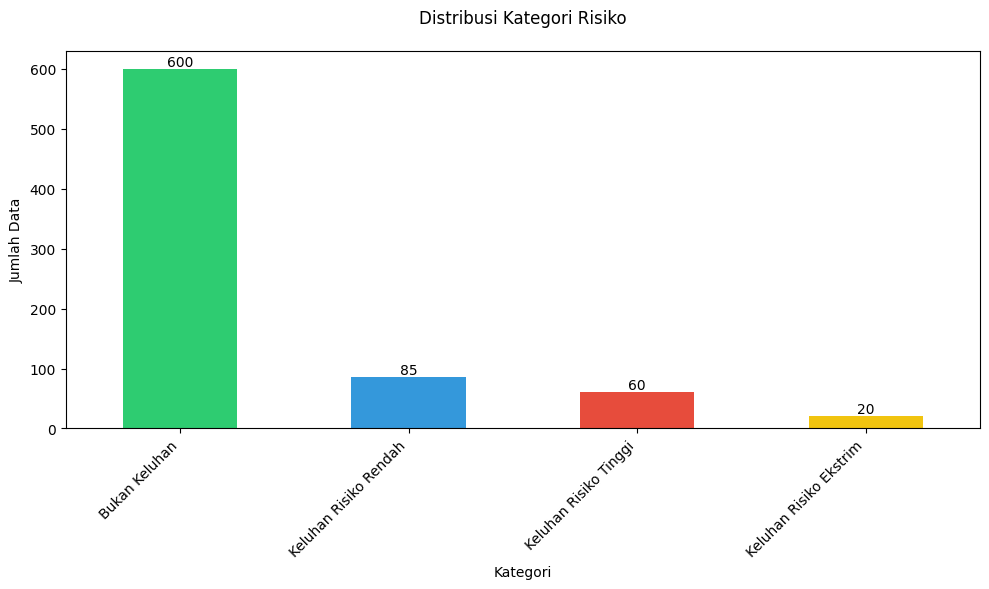


Statistik Detail:
Total data: 765

Distribusi per kategori:
Bukan Keluhan            : 600 (78.43%)
Keluhan Risiko Rendah    :  85 (11.11%)
Keluhan Risiko Tinggi    :  60 (7.84%)
Keluhan Risiko Ekstrim   :  20 (2.61%)

Rasio imbalance:
Majority vs Minority: 30.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset hasil pelabelan
df = pd.read_csv('/content/drive/MyDrive/DATA/labeled_dataset_2024.csv')

# Hitung distribusi kategori risiko
dist = df['risk_category'].value_counts()
print("Distribusi Kategori Risiko:")
print(dist)

# Visualisasi distribusi dengan bar chart
plt.figure(figsize=(10, 6))
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']  # Warna bisa disesuaikan dengan urutan kategori
ax = dist.plot(kind='bar', color=colors)
plt.title('Distribusi Kategori Risiko', pad=20)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45, ha='right')

# Tambahkan label jumlah di atas tiap bar
for i, v in enumerate(dist):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Tampilkan statistik detail distribusi
total = len(df)
print("\nStatistik Detail:")
print("=" * 50)
print(f"Total data: {total}")
print("\nDistribusi per kategori:")
for category, count in dist.items():
    percentage = (count / total) * 100
    print(f"{category:<25}: {count:>3} ({percentage:.2f}%)")

# Hitung rasio imbalance (majority vs minority)
if dist.min() > 0:
    imbalance_ratio = dist.max() / dist.min()
    print("\nRasio imbalance:")
    print(f"Majority vs Minority: {imbalance_ratio:.2f}")
else:
    print("\nRasio imbalance tidak dapat dihitung karena ada kategori dengan jumlah 0.")


# Balancing Data -- Oversampling



In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Muat dataset asli (misalnya, dataset dengan kolom 'text' dan 'risk_category')
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024_with_class_weights.csv"
df = pd.read_csv(dataset_path)

# Pastikan kolom 'risk_category' ada, kemudian mapping label ke angka
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}
df['label'] = df['risk_category'].map(label_mapping)

# Tampilkan distribusi asli
print("Distribusi kelas asli:")
print(df['label'].value_counts())

# Lakukan oversampling menggunakan RandomOverSampler
ros = RandomOverSampler(random_state=42)
df_balanced, y_balanced = ros.fit_resample(df, df['label'])

print("\nDistribusi kelas setelah oversampling:")
print(pd.Series(y_balanced).value_counts())

# Simpan dataset oversampled ke file baru
oversampled_path = "/content/drive/MyDrive/DATA/oversampled_labeled_dataset_2024.csv"
df_balanced.to_csv(oversampled_path, index=False)
print(f"\nDataset oversampled telah disimpan di: {oversampled_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Distribusi kelas asli:
label
0    600
1     85
2     60
3     20
Name: count, dtype: int64

Distribusi kelas setelah oversampling:
label
0    600
3    600
2    600
1    600
Name: count, dtype: int64

Dataset oversampled telah disimpan di: /content/drive/MyDrive/DATA/oversampled_labeled_dataset_2024.csv


# PENGEMBANGAN MODEL INDOBERT

# Indobert 1-ARSITEKTUR INDOBERT

In [ ]:
# PART 1: ARSITEKTUR INDOBERT → SIMPAN MODEL
from google.colab import drive
drive.mount('/content/drive')

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Tentukan model pre-trained IndoBERT
model_name = "indobenchmark/indobert-large-p1"

# Muat tokenizer dan model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)

# Simpan arsitektur (model & tokenizer) ke folder
save_path = "/content/drive/MyDrive/DATA/indobert_architecture"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f"Model arsitektur telah disimpan di: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model arsitektur telah disimpan di: /content/drive/MyDrive/DATA/indobert_architecture


# Indobert 2- TRAINING DAN VALIDASI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Menggunakan device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Jumlah data: Train=1680, Validation=360, Test=360


Epoch 1/10: 100%|██████████| 53/53 [00:55<00:00,  1.05s/it, loss=0.323]



Epoch 1 Summary:
Training Loss: 0.8026, Training Accuracy: 47.98%
Validation Loss: 0.3144, Validation Accuracy: 82.22%


Epoch 2/10: 100%|██████████| 53/53 [00:57<00:00,  1.08s/it, loss=0.033]



Epoch 2 Summary:
Training Loss: 0.1502, Training Accuracy: 91.85%
Validation Loss: 0.0416, Validation Accuracy: 96.39%


Epoch 3/10: 100%|██████████| 53/53 [00:58<00:00,  1.10s/it, loss=0.00137]



Epoch 3 Summary:
Training Loss: 0.0181, Training Accuracy: 98.99%
Validation Loss: 0.0148, Validation Accuracy: 98.89%


Epoch 4/10: 100%|██████████| 53/53 [00:58<00:00,  1.11s/it, loss=0.000333]



Epoch 4 Summary:
Training Loss: 0.0019, Training Accuracy: 99.94%
Validation Loss: 0.0222, Validation Accuracy: 98.61%


Epoch 5/10: 100%|██████████| 53/53 [00:59<00:00,  1.12s/it, loss=0.000354]



Epoch 5 Summary:
Training Loss: 0.0013, Training Accuracy: 99.94%
Validation Loss: 0.0282, Validation Accuracy: 98.61%
Early stopping triggered.

Test Evaluation Metrics:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.98      0.91      0.95       104
 Keluhan Risiko Rendah       0.95      0.98      0.97        86
 Keluhan Risiko Tinggi       0.95      1.00      0.97        78
Keluhan Risiko Ekstrim       0.99      1.00      0.99        92

              accuracy                           0.97       360
             macro avg       0.97      0.97      0.97       360
          weighted avg       0.97      0.97      0.97       360



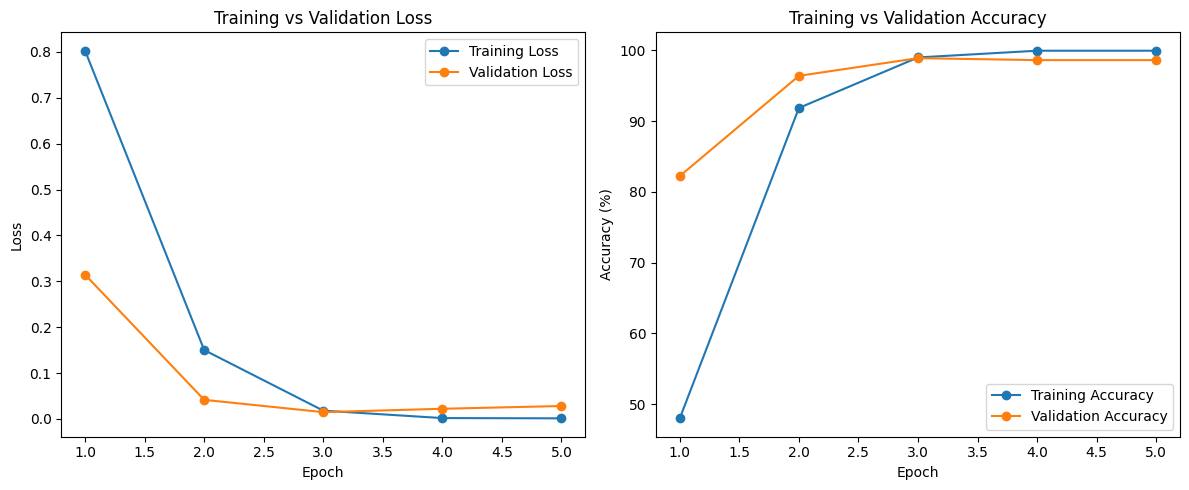

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cek ketersediaan GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Menggunakan device:", device)

# Set global seed untuk reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# Definisi Focal Loss dengan gamma=1.2
class FocalLoss(nn.Module):
    def __init__(self, gamma=1.2, weight=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.weight = weight  # Di sini akan kita set ke tensor ones (karena data sudah seimbang)
        self.reduction = reduction

    def forward(self, inputs, targets):
        logpt = F.log_softmax(inputs, dim=1)
        pt = torch.exp(logpt)
        focal_term = (1 - pt) ** self.gamma
        loss = F.nll_loss(focal_term * logpt, targets, weight=self.weight, reduction=self.reduction)
        return loss

# Karena data sudah di-oversample sehingga seimbang, kita set class weights ke 1 untuk tiap kelas.
class_weights_tensor = torch.ones(4, dtype=torch.float).to(device)

# Inisialisasi Focal Loss dengan gamma=1.2
focal_loss_fn = FocalLoss(gamma=1.2, weight=class_weights_tensor, reduction='mean')

# Muat dataset oversampled dari file
dataset_path = "/content/drive/MyDrive/DATA/oversampled_labeled_dataset_2024.csv"
df = pd.read_csv(dataset_path)

# Validasi kolom dataset (pastikan kolom 'text' dan 'label' ada)
expected_columns = ['text', 'risk_category']  # 'risk_category' ada, namun mapping sudah disimpan di 'label'
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Dataset harus memiliki kolom {expected_columns}, ditemukan: {df.columns}")

# Jika belum dilakukan, mapping kategori risiko ke angka
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}
# Pastikan kolom 'label' sudah ada; jika belum, buat:
if 'label' not in df.columns:
    df['label'] = df['risk_category'].map(label_mapping)

# Custom Dataset Class
class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=64):
        self.texts = dataframe['text'].tolist()
        self.labels = dataframe['label'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Load tokenizer dan model IndoBERT
model_name = "indobenchmark/indobert-large-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
model.to(device)

# Dataset splitting 70% - 15% - 15%
full_dataset = TextDataset(df, tokenizer, max_length=64)
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])
print(f"Jumlah data: Train={len(train_dataset)}, Validation={len(val_dataset)}, Test={len(test_dataset)}")

# DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Setup optimizer dan scheduler
epochs = 10
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)

# Fungsi evaluasi (menggunakan focal loss untuk konsistensi)
def evaluate(model, dataloader):
    model.eval()
    losses = []
    correct_predictions = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = focal_loss_fn(logits, labels)

            losses.append(loss.item())
            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            total += labels.size(0)

    return (correct_predictions.double() / total) * 100, np.mean(losses)

# Training loop dengan Early Stopping dan pencatatan metrik per epoch
best_val_loss = float('inf')
patience = 2
patience_counter = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total = 0

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = focal_loss_fn(logits, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        total += labels.size(0)
        loop.set_postfix(loss=loss.item())

    train_epoch_loss = total_loss / len(train_loader)
    train_epoch_acc = (correct_predictions.double() / total) * 100
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_acc.item())

    val_epoch_acc, val_epoch_loss = evaluate(model, val_loader)
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_acc.item())

    print(f"\nEpoch {epoch+1} Summary:")
    print(f"Training Loss: {train_epoch_loss:.4f}, Training Accuracy: {train_epoch_acc:.2f}%")
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.2f}%")

    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        patience_counter = 0
        model.save_pretrained("indobert_best_model")
        tokenizer.save_pretrained("indobert_best_model")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Evaluasi pada test set
def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    return true_labels, predictions

true_labels, predictions = get_predictions(model, test_loader)
print("\nTest Evaluation Metrics:")
print(classification_report(true_labels, predictions, target_names=list(label_mapping.keys()), zero_division=0))

# Plot grafik Training vs Validation Loss dan Accuracy
epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss', marker='o')
plt.plot(epochs_range, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# IndoBert 3- Evaluasi performa (akurasi, presisi, recall, F1-score)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_metrics(model, dataloader):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return true_labels, predictions

# Evaluasi metrik performa pada test set
true_labels, predictions = evaluate_metrics(model, test_loader)

# Hitung metrik evaluasi
acc = accuracy_score(true_labels, predictions) * 100
prec = precision_score(true_labels, predictions, average='weighted') * 100
rec = recall_score(true_labels, predictions, average='weighted') * 100
f1 = f1_score(true_labels, predictions, average='weighted') * 100

print("Evaluation Metrics on Test Set:")
print(f"Accuracy: {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall: {rec:.2f}%")
print(f"F1-score: {f1:.2f}%\n")

print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=list(label_mapping.keys())))


Evaluation Metrics on Test Set:
Accuracy: 96.94%
Precision: 96.99%
Recall: 96.94%
F1-score: 96.92%

Classification Report:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.98      0.91      0.95       104
 Keluhan Risiko Rendah       0.95      0.98      0.97        86
 Keluhan Risiko Tinggi       0.95      1.00      0.97        78
Keluhan Risiko Ekstrim       0.99      1.00      0.99        92

              accuracy                           0.97       360
             macro avg       0.97      0.97      0.97       360
          weighted avg       0.97      0.97      0.97       360



# IndoBert 4- Analisis Confusion Matrix

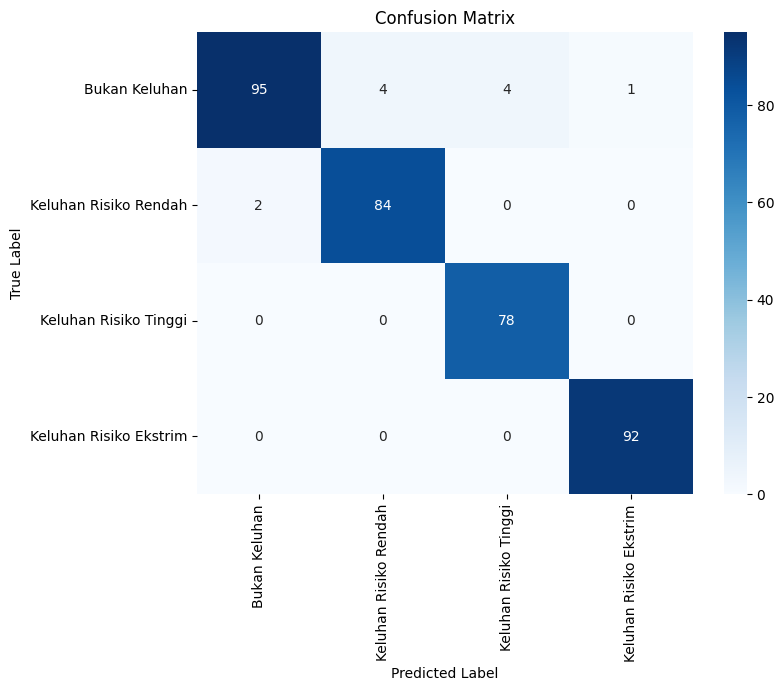

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix dari prediksi test
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_mapping.keys()),
            yticklabels=list(label_mapping.keys()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# PENGEMBANGAN MODEL SVM -- Sampai disini belum fix

Arsitektur Model SVM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 🖥️ Import Library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📂 Path dataset baru
dataset_path = "/content/drive/MyDrive/DATA/oversampled_labeled_dataset_2024.csv"

# 📝 Load dataset CSV
df = pd.read_csv(dataset_path)

# 🔍 Cek kolom yang tersedia
print("Kolom dataset:", df.columns)

# 🚀 Pastikan dataset memiliki kolom yang sesuai
required_columns = {'text', 'risk_category'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset harus memiliki kolom: {required_columns}")

# 🔢 Mapping label kategori risiko
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}

df['risk_category'] = df['risk_category'].map(label_mapping)

# 🛠️ Split dataset menjadi train (70%), validation (15%), test (15%)
train_ratio, val_ratio = 0.7, 0.15  # 70% train, 15% validation, 15% test
train_size = int(len(df) * train_ratio)
val_size = int(len(df) * val_ratio)
test_size = len(df) - train_size - val_size

train_df, val_df, test_df = np.split(df.sample(frac=1, random_state=42), [train_size, train_size + val_size])

print("Jumlah data:")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# Gabungkan data train dan validation
combined_train = pd.concat([train_df, val_df], ignore_index=True)

# Ekstrak fitur dan label
X_train = combined_train['text']
y_train = combined_train['risk_category']
X_test = test_df['text']
y_test = test_df['risk_category']

# Vektorisasi teks dengan TF-IDF (ngram_range: unigram hingga trigram)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Definisikan parameter grid untuk SVM dengan kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# Inisialisasi model SVM dengan class_weight='balanced'
svm = SVC(class_weight='balanced')

# Lakukan grid search dengan validasi silang 5-fold
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Tampilkan parameter terbaik dan akurasi cross-validation
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Gunakan model terbaik untuk prediksi pada test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_tfidf)

# Evaluasi performa model
acc = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}%".format(acc * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'word_count', 'language',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category',
       'computed_category', 'label_consistent', 'label', 'class_weight'],
      dtype='object')
Jumlah data:
Train: 1680, Validation: 360, Test: 360


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


ValueError: np.nan is an invalid document, expected byte or unicode string.

Hasil Training dan Validasi

Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Jumlah data:
Train: 611, Validation: 131, Test: 131
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 81.94%

--- Cross-Validation Results ---
Training scores per fold: [0.99831366 0.99831366 0.996633   0.99494949 0.9983165 ]
Validation scores per fold: [0.82550336 0.82550336 0.80405405 0.82432432 0.81756757]
Rata-rata Training Accuracy: 99.73%
Rata-rata Validation Accuracy: 81.94%


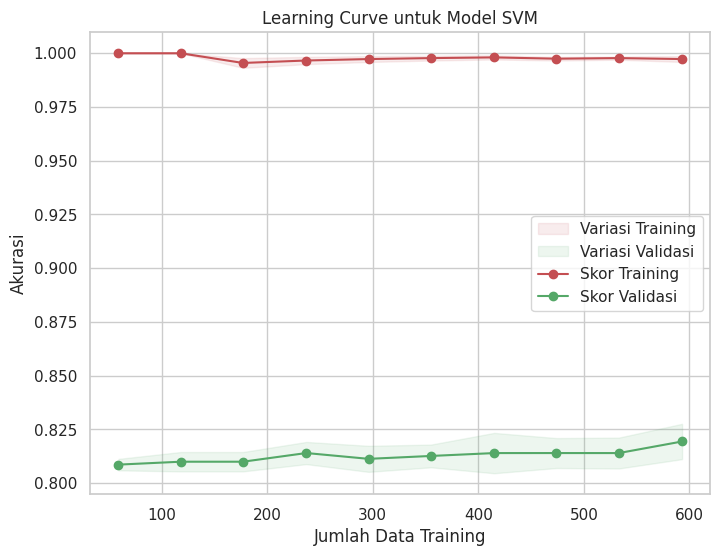

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Evaluasi pada Test Set ---
Test Set Accuracy: 85.50%

Classification Report:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.91      0.98      0.95       106
 Keluhan Risiko Rendah       0.50      0.54      0.52        13
 Keluhan Risiko Tinggi       0.33      0.11      0.17         9
Keluhan Risiko Ekstrim       0.00      0.00      0.00         3

              accuracy                           0.85       131
             macro avg       0.44      0.41      0.41       131
          weighted avg       0.81      0.85      0.83       131

Confusion Matrix:
[[104   2   0   0]
 [  6   7   0   0]
 [  4   4   1   0]
 [  0   1   2   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 🖥️ Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# -----------------------------
# 1. Pemuatan Data dan Vektorisasi
# -----------------------------
# 📂 Path dataset baru
dataset_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"

# 📝 Load dataset CSV
df = pd.read_csv(dataset_path)

# 🔍 Cek kolom yang tersedia
print("Kolom dataset:", df.columns)

# 🚀 Pastikan dataset memiliki kolom yang sesuai
required_columns = {'text', 'risk_category'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset harus memiliki kolom: {required_columns}")

# 🔢 Mapping label kategori risiko
label_mapping = {
    "Bukan Keluhan": 0,
    "Keluhan Risiko Rendah": 1,
    "Keluhan Risiko Tinggi": 2,
    "Keluhan Risiko Ekstrim": 3
}
df['risk_category'] = df['risk_category'].map(label_mapping)

# 🛠️ Split dataset menjadi 70% train, 15% validation, dan 15% test
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['risk_category'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['risk_category'])

print("Jumlah data:")
print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

# Gabungkan data train dan validation untuk proses Grid Search dan learning curve
combined_train = pd.concat([train_df, val_df], ignore_index=True)
X_train = combined_train['text']
y_train = combined_train['risk_category']
X_test = test_df['text']
y_test = test_df['risk_category']

# Vektorisasi teks dengan TF-IDF (ngram_range: unigram hingga trigram, max_features: 10,000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# -----------------------------
# 2. Grid Search dan Model SVM
# -----------------------------
# Definisikan parameter grid untuk SVM dengan kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

# Inisialisasi model SVM dengan class_weight='balanced'
svm = SVC(class_weight='balanced')

# Lakukan grid search dengan validasi silang 5-fold
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Tampilkan parameter terbaik dan akurasi cross-validation
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# Dapatkan model terbaik
best_svm = grid_search.best_estimator_

# -----------------------------
# 3. Hasil Training dan Validasi (Cross-Validation)
# -----------------------------
cv_results = cross_validate(
    best_svm,
    X_train_tfidf,
    y_train,
    cv=5,
    return_train_score=True,
    scoring='accuracy',
    n_jobs=-1
)

print("\n--- Cross-Validation Results ---")
print("Training scores per fold:", cv_results['train_score'])
print("Validation scores per fold:", cv_results['test_score'])
print("Rata-rata Training Accuracy: {:.2f}%".format(np.mean(cv_results['train_score']) * 100))
print("Rata-rata Validation Accuracy: {:.2f}%".format(np.mean(cv_results['test_score']) * 100))

# -----------------------------
# 4. Plot Learning Curve
# -----------------------------
train_sizes, train_scores, val_scores = learning_curve(
    best_svm,
    X_train_tfidf,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r", label="Variasi Training")
plt.fill_between(train_sizes,
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std,
                 alpha=0.1, color="g", label="Variasi Validasi")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor Training")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Skor Validasi")
plt.xlabel("Jumlah Data Training")
plt.ylabel("Akurasi")
plt.title("Learning Curve untuk Model SVM")
plt.legend(loc="best")
plt.grid(True)

# Simpan gambar sebagai PNG sebelum menampilkannya
plt.savefig('learning_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Download file learning_curve.png (khusus Google Colab)
files.download('learning_curve.png')

# -----------------------------
# 5. Evaluasi Model pada Test Set
# -----------------------------
y_pred = best_svm.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print("\n--- Evaluasi pada Test Set ---")
print("Test Set Accuracy: {:.2f}%".format(acc * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(label_mapping.keys())))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Evaluasi performa (akurasi, presisi, recall, F1-score)


--- Evaluasi Performa pada Test Set ---
Test Set Accuracy: 85.50%
Precision (weighted): 0.81
Recall (weighted): 0.85
F1-score (weighted): 0.83


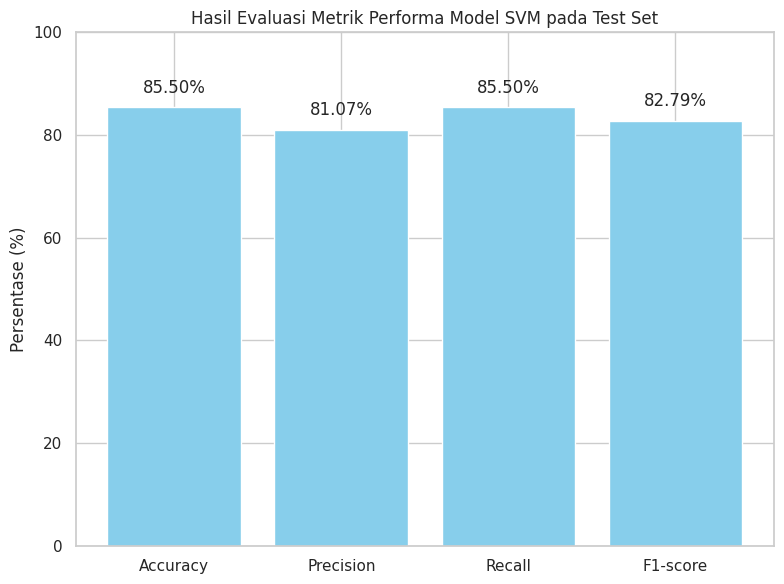

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pastikan bahwa y_test dan y_pred sudah tersedia, misalnya:
# y_pred = best_svm.predict(X_test_tfidf)

# Hitung metrik evaluasi secara terpisah
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Tampilkan hasil evaluasi di konsol
print("\n--- Evaluasi Performa pada Test Set ---")
print("Test Set Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision (weighted): {:.2f}".format(precision))
print("Recall (weighted): {:.2f}".format(recall))
print("F1-score (weighted): {:.2f}".format(f1))

# Buat dictionary untuk metrik
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

# Buat grafik batang untuk menampilkan metrik dalam persentase
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(metrics.keys(), [v * 100 for v in metrics.values()], color='skyblue')
ax.set_ylim(0, 100)
ax.set_ylabel('Persentase (%)')
ax.set_title('Hasil Evaluasi Metrik Performa Model SVM pada Test Set')

# Tambahkan nilai persentase di atas setiap batang
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()

# Simpan grafik sebagai file PNG dan tampilkan
plt.savefig("evaluation_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# Jika menggunakan Google Colab, Anda bisa mendownload file PNG dengan:
# from google.colab import files
# files.download("evaluation_metrics.png")


Analisis Confusion Matrix

Confusion Matrix:
[[104   2   0   0]
 [  6   7   0   0]
 [  4   4   1   0]
 [  0   1   2   0]]


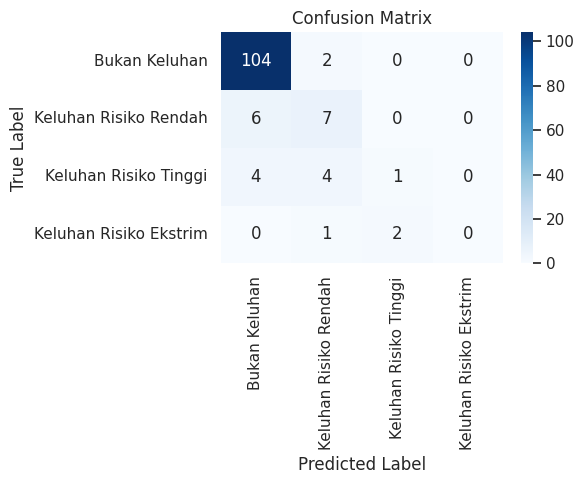

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from google.colab import files

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tentukan label kelas berdasarkan mapping yang telah didefinisikan
class_names = list(label_mapping.keys())

# Tampilkan nilai confusion matrix pada console
print("Confusion Matrix:")
print(cm)

# Visualisasikan confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()  # Pastikan layout tidak terpotong

# Simpan grafik sebagai file PNG dengan resolusi tinggi
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Jika menggunakan Google Colab, unduh file PNG
files.download("confusion_matrix.png")


#PENGEMBANGAN MODEL ENSEMBLE

ARSITEKTUR MODEL ENSEMBLE


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pastikan Google Drive sudah ter-mount jika diperlukan (uncomment jika perlu)
# from google.colab import drive
# drive.mount('/content/drive')

# Install library yang diperlukan
!pip install transformers datasets evaluate imblearn --quiet

# Import libraries
import pandas as pd
import numpy as np
import torch
import evaluate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 1. Muat dataset
data_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"
df = pd.read_csv(data_path)
print("Kolom dataset:", df.columns)
# Gunakan kolom 'text' dan 'risk_category'
df = df[['text', 'risk_category']]

# Encode label menjadi numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['risk_category'])
print("Kelas:", le.classes_)

# 2. Split data secara stratified: 70% training, 15% validasi, 15% test
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Reset index untuk memastikan indeks yang rapi
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

print("Jumlah data training:", len(train_df))
print("Jumlah data validasi:", len(valid_df))
print("Jumlah data test:", len(test_df))

# 3. Fine-tuning IndoBERT untuk klasifikasi dengan Hugging Face Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Konversi DataFrame ke Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
valid_dataset = Dataset.from_pandas(valid_df[['text', 'label']])
test_dataset  = Dataset.from_pandas(test_df[['text', 'label']])

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

# Rename kolom 'label' menjadi 'labels'
train_dataset = train_dataset.rename_column("label", "labels")
valid_dataset = valid_dataset.rename_column("label", "labels")
test_dataset  = test_dataset.rename_column("label", "labels")

# Set format untuk PyTorch
train_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
valid_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

# Load model IndoBERT untuk klasifikasi (sesuaikan num_labels)
num_labels = len(le.classes_)
model_indobert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Training arguments dengan 10 epoch dan non-reporting wandb
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[]  # Nonaktifkan reporting (misalnya, wandb)
)

# Compute metrics untuk evaluasi
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Buat Trainer dengan validasi terpisah
trainer = Trainer(
    model=model_indobert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

# Fine-tuning IndoBERT
trainer.train()

# Evaluasi IndoBERT pada test set
results_indobert = trainer.evaluate(test_dataset)
print("Hasil Evaluasi IndoBERT:", results_indobert)

# Dapatkan output probabilitas IndoBERT pada test set
indobert_preds = trainer.predict(test_dataset)
indobert_probs = torch.nn.functional.softmax(torch.tensor(indobert_preds.predictions), dim=-1).numpy()

# 4. Membangun Model SVM dengan TF-IDF dan SMOTE
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(train_df['text'])
X_valid_tfidf = vectorizer.transform(valid_df['text'])
X_test_tfidf = vectorizer.transform(test_df['text'])

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42)
X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, train_df['label'])
print("Ukuran data training setelah SMOTE:", X_train_tfidf_res.shape)

# Optimasi SVM dengan Grid Search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svm = SVC(kernel='rbf', probability=True)
grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_tfidf_res, y_train_res)
best_svm = grid.best_estimator_
print("Parameter SVM Terbaik:", grid.best_params_)

# Prediksi probabilitas SVM pada test set (data test tetap original)
svm_probs = best_svm.predict_proba(X_test_tfidf)

# 5. Pengembangan Model Ensemble
# 5.1 Stacking: Gabungkan probabilitas dari IndoBERT dan SVM sebagai fitur untuk meta-learner
X_meta = np.hstack([indobert_probs, svm_probs])
y_meta = test_df['label'].values

meta_learner = LogisticRegression(max_iter=1000)
meta_learner.fit(X_meta, y_meta)
ensemble_preds_stack = meta_learner.predict(X_meta)
acc_stack = accuracy_score(y_meta, ensemble_preds_stack)
print("Akurasi Ensemble (Stacking):", acc_stack)
print(classification_report(y_meta, ensemble_preds_stack, target_names=le.classes_))

# 5.2 Voting: Gabungkan probabilitas secara sederhana dengan penjumlahan dan ambil argmax
vote_preds = np.argmax(indobert_probs + svm_probs, axis=1)
acc_vote = accuracy_score(y_meta, vote_preds)
print("Akurasi Ensemble (Voting):", acc_vote)
print(classification_report(y_meta, vote_preds, target_names=le.classes_))

# 5.3 Weighted Voting: Terapkan bobot pada masing-masing model (misal, w1 = 0.55 untuk IndoBERT dan w2 = 0.45 untuk SVM)
w1, w2 = 0.55, 0.45
weighted_vote_preds = np.argmax(w1 * indobert_probs + w2 * svm_probs, axis=1)
acc_weighted_vote = accuracy_score(y_meta, weighted_vote_preds)
print("Akurasi Ensemble (Weighted Voting):", acc_weighted_vote)
print(classification_report(y_meta, weighted_vote_preds, target_names=le.classes_))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Kelas: ['Bukan Keluhan' 'Keluhan Risiko Ekstrim' 'Keluhan Risiko Rendah'
 'Keluhan Risiko Tinggi']
Jumlah data training: 611
Jumlah data validasi: 131
Jumlah data test: 131


Map:   0%|          | 0/611 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.436324,0.824427
2,No log,0.372630,0.839695
3,0.480600,0.442276,0.839695
4,0.480600,0.408529,0.847328
5,0.218500,0.429616,0.839695
6,0.218500,0.452468,0.839695
7,0.218500,0.488092,0.839695
8,0.090700,0.499722,0.832061
9,0.090700,0.507689,0.839695
10,0.032700,0.510358,0.839695


Hasil Evaluasi IndoBERT: {'eval_loss': 0.5151075720787048, 'eval_accuracy': 0.8320610687022901, 'eval_runtime': 0.8383, 'eval_samples_per_second': 156.271, 'eval_steps_per_second': 5.965, 'epoch': 10.0}
Ukuran data training setelah SMOTE: (1976, 10000)
Parameter SVM Terbaik: {'C': 10, 'gamma': 1}
Akurasi Ensemble (Stacking): 0.8396946564885496
                        precision    recall  f1-score   support

         Bukan Keluhan       0.90      0.98      0.94       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.40      0.46      0.43        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.84       131
             macro avg       0.32      0.36      0.34       131
          weighted avg       0.77      0.84      0.80       131

Akurasi Ensemble (Voting): 0.8091603053435115
                        precision    recall  f1-score   support

         Bukan Keluhan      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

TRAINING DAN VALIDASI

In [ ]:
# Pastikan Google Drive sudah ter-mount jika diperlukan (uncomment jika perlu)
# from google.colab import drive
# drive.mount('/content/drive')

# Install library yang diperlukan
!pip install transformers datasets evaluate imblearn --quiet

# Import libraries
import pandas as pd
import numpy as np
import torch
import evaluate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 1. Muat dataset
data_path = "/content/drive/MyDrive/DATA/labeled_dataset_2024.csv"
df = pd.read_csv(data_path)
print("Kolom dataset:", df.columns)
# Gunakan kolom 'text' dan 'risk_category'
df = df[['text', 'risk_category']]

# Encode label menjadi numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['risk_category'])
print("Kelas:", le.classes_)

# 2. Split data secara stratified: 70% training, 15% validasi, 15% test
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['label'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

# Reset index untuk memastikan indeks yang rapi
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

print("Jumlah data training:", len(train_df))
print("Jumlah data validasi:", len(valid_df))
print("Jumlah data test:", len(test_df))

# 3. Fine-tuning IndoBERT untuk klasifikasi dengan Hugging Face Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Konversi DataFrame ke Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
valid_dataset = Dataset.from_pandas(valid_df[['text', 'label']])
test_dataset  = Dataset.from_pandas(test_df[['text', 'label']])

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
valid_dataset = valid_dataset.map(tokenize_function, batched=True)
test_dataset  = test_dataset.map(tokenize_function, batched=True)

# Rename kolom 'label' menjadi 'labels'
train_dataset = train_dataset.rename_column("label", "labels")
valid_dataset = valid_dataset.rename_column("label", "labels")
test_dataset  = test_dataset.rename_column("label", "labels")

# Set format untuk PyTorch
train_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
valid_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])
test_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

# Load model IndoBERT untuk klasifikasi (sesuaikan num_labels)
num_labels = len(le.classes_)
model_indobert = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Training arguments dengan 10 epoch dan non-reporting wandb
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[]  # Nonaktifkan reporting (misalnya, wandb)
)

# Compute metrics untuk evaluasi IndoBERT
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Buat Trainer dengan validasi terpisah
trainer = Trainer(
    model=model_indobert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics
)

# Training IndoBERT
trainer.train()

# Evaluasi IndoBERT pada test set
results_indobert = trainer.evaluate(test_dataset)
print("Hasil Evaluasi IndoBERT:", results_indobert)

# Dapatkan output probabilitas IndoBERT pada test set
indobert_preds = trainer.predict(test_dataset)
indobert_probs = torch.nn.functional.softmax(torch.tensor(indobert_preds.predictions), dim=-1).numpy()

# 4. Membangun Model SVM dengan TF-IDF dan SMOTE
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X_train_tfidf = vectorizer.fit_transform(train_df['text'])
X_valid_tfidf = vectorizer.transform(valid_df['text'])
X_test_tfidf = vectorizer.transform(test_df['text'])

# Terapkan SMOTE pada data training untuk mengatasi ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, train_df['label'])
print("Ukuran data training setelah SMOTE:", X_train_tfidf_res.shape)

# Optimasi SVM dengan Grid Search menggunakan data training yang sudah di-resample
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svm = SVC(kernel='rbf', probability=True)
grid = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_tfidf_res, y_train_res)
best_svm = grid.best_estimator_
print("Parameter SVM Terbaik:", grid.best_params_)

# Prediksi probabilitas SVM pada test set (data test tetap original)
svm_probs = best_svm.predict_proba(X_test_tfidf)

# 5. Pengembangan Model Ensemble
# -------------------------------------------------------------
# Untuk tahap ensemble, kita akan menggunakan prediksi dari kedua model:
# - Gunakan validasi untuk melatih meta learner (stacking)
# - Gunakan test set untuk evaluasi meta learner
# -------------------------------------------------------------

# 5.1 Training Meta Learner (Stacking) menggunakan Validasi sebagai Meta Training Set
# Dapatkan prediksi probabilitas IndoBERT pada validasi
indobert_preds_valid = trainer.predict(valid_dataset)
indobert_probs_valid = torch.nn.functional.softmax(torch.tensor(indobert_preds_valid.predictions), dim=-1).numpy()

# Dapatkan prediksi probabilitas SVM pada validasi
svm_probs_valid = best_svm.predict_proba(X_valid_tfidf)

# Gabungkan probabilitas sebagai fitur meta untuk training
X_meta_train = np.hstack([indobert_probs_valid, svm_probs_valid])
y_meta_train = valid_df['label'].values

# Latih meta learner (misal: Logistic Regression)
meta_learner = LogisticRegression(max_iter=1000)
meta_learner.fit(X_meta_train, y_meta_train)

# 5.2 Evaluasi Meta Learner pada Test Set
# Gabungkan prediksi dari IndoBERT dan SVM pada test set
X_meta_test = np.hstack([indobert_probs, svm_probs])
y_meta_test = test_df['label'].values

ensemble_preds_stack = meta_learner.predict(X_meta_test)
acc_stack = accuracy_score(y_meta_test, ensemble_preds_stack)
print("Akurasi Ensemble (Stacking):", acc_stack)
print(classification_report(y_meta_test, ensemble_preds_stack, target_names=le.classes_))

# 5.3 Voting: Gabungkan probabilitas secara sederhana dari kedua model dan ambil argmax
vote_preds = np.argmax(indobert_probs + svm_probs, axis=1)
acc_vote = accuracy_score(y_meta_test, vote_preds)
print("Akurasi Ensemble (Voting):", acc_vote)
print(classification_report(y_meta_test, vote_preds, target_names=le.classes_))

# 5.4 Weighted Voting: Terapkan bobot pada masing-masing model (misal, w1 = 0.55 untuk IndoBERT dan w2 = 0.45 untuk SVM)
w1, w2 = 0.55, 0.45
weighted_vote_preds = np.argmax(w1 * indobert_probs + w2 * svm_probs, axis=1)
acc_weighted_vote = accuracy_score(y_meta_test, weighted_vote_preds)
print("Akurasi Ensemble (Weighted Voting):", acc_weighted_vote)
print(classification_report(y_meta_test, weighted_vote_preds, target_names=le.classes_))


Kolom dataset: Index(['publishedAtDate', 'stars', 'text', 'processed_text', 'text_length',
       'sentiment_score', 'risk_score', 'total_score', 'risk_category'],
      dtype='object')
Kelas: ['Bukan Keluhan' 'Keluhan Risiko Ekstrim' 'Keluhan Risiko Rendah'
 'Keluhan Risiko Tinggi']
Jumlah data training: 611
Jumlah data validasi: 131
Jumlah data test: 131


Map:   0%|          | 0/611 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Map:   0%|          | 0/131 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.468311,0.824427
2,No log,0.371972,0.839695
3,0.491700,0.411030,0.839695
4,0.491700,0.383903,0.832061
5,0.201800,0.410506,0.824427
6,0.201800,0.441589,0.824427
7,0.201800,0.419515,0.839695
8,0.080900,0.449881,0.816794
9,0.080900,0.462494,0.824427
10,0.027500,0.465356,0.816794


Hasil Evaluasi IndoBERT: {'eval_loss': 0.43001192808151245, 'eval_accuracy': 0.816793893129771, 'eval_runtime': 0.8558, 'eval_samples_per_second': 153.081, 'eval_steps_per_second': 5.843, 'epoch': 10.0}
Ukuran data training setelah SMOTE: (1976, 10000)
Parameter SVM Terbaik: {'C': 10, 'gamma': 1}


Akurasi Ensemble (Stacking): 0.8549618320610687
                        precision    recall  f1-score   support

         Bukan Keluhan       0.90      1.00      0.95       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.50      0.46      0.48        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.85       131
             macro avg       0.35      0.37      0.36       131
          weighted avg       0.78      0.85      0.81       131

Akurasi Ensemble (Voting): 0.8091603053435115
                        precision    recall  f1-score   support

         Bukan Keluhan       0.82      1.00      0.90       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.00      0.00      0.00        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.81       131
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Evaluasi performa (akurasi, presisi, recall, F1-score)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Evaluasi Performa Ensemble Model\n")

# Evaluasi untuk Stacking Ensemble
print("=== Stacking Ensemble ===")
acc_stack = accuracy_score(y_meta_test, ensemble_preds_stack)
precision_stack = precision_score(y_meta_test, ensemble_preds_stack, average='weighted')
recall_stack = recall_score(y_meta_test, ensemble_preds_stack, average='weighted')
f1_stack = f1_score(y_meta_test, ensemble_preds_stack, average='weighted')

print("Akurasi    :", acc_stack)
print("Presisi    :", precision_stack)
print("Recall     :", recall_stack)
print("F1 Score   :", f1_stack)
print("Classification Report:\n", classification_report(y_meta_test, ensemble_preds_stack, target_names=le.classes_))
print("\n")

# Evaluasi untuk Voting Ensemble
print("=== Voting Ensemble ===")
acc_vote = accuracy_score(y_meta_test, vote_preds)
precision_vote = precision_score(y_meta_test, vote_preds, average='weighted')
recall_vote = recall_score(y_meta_test, vote_preds, average='weighted')
f1_vote = f1_score(y_meta_test, vote_preds, average='weighted')

print("Akurasi    :", acc_vote)
print("Presisi    :", precision_vote)
print("Recall     :", recall_vote)
print("F1 Score   :", f1_vote)
print("Classification Report:\n", classification_report(y_meta_test, vote_preds, target_names=le.classes_))
print("\n")

# Evaluasi untuk Weighted Voting Ensemble
print("=== Weighted Voting Ensemble ===")
acc_weighted_vote = accuracy_score(y_meta_test, weighted_vote_preds)
precision_weighted_vote = precision_score(y_meta_test, weighted_vote_preds, average='weighted')
recall_weighted_vote = recall_score(y_meta_test, weighted_vote_preds, average='weighted')
f1_weighted_vote = f1_score(y_meta_test, weighted_vote_preds, average='weighted')

print("Akurasi    :", acc_weighted_vote)
print("Presisi    :", precision_weighted_vote)
print("Recall     :", recall_weighted_vote)
print("F1 Score   :", f1_weighted_vote)
print("Classification Report:\n", classification_report(y_meta_test, weighted_vote_preds, target_names=le.classes_))


Evaluasi Performa Ensemble Model

=== Stacking Ensemble ===
Akurasi    : 0.8549618320610687
Presisi    : 0.7764911372751974
Recall     : 0.8549618320610687
F1 Score   : 0.8134460196292257
Classification Report:
                         precision    recall  f1-score   support

         Bukan Keluhan       0.90      1.00      0.95       106
Keluhan Risiko Ekstrim       0.00      0.00      0.00         4
 Keluhan Risiko Rendah       0.50      0.46      0.48        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.85       131
             macro avg       0.35      0.37      0.36       131
          weighted avg       0.78      0.85      0.81       131



=== Voting Ensemble ===
Akurasi    : 0.8091603053435115
Presisi    : 0.664891413693118
Recall     : 0.8091603053435115
F1 Score   : 0.7299658924801039
Classification Report:
                         precision    recall  f1-score   support

         Bukan Keluhan       0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Buat DataLoader untuk test set (batch size bisa disesuaikan)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Set model ke mode evaluasi
model_indobert.eval()
all_preds = []
all_labels = []

# Nonaktifkan perhitungan gradien
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_indobert(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Hitung metrik evaluasi
acc = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

print("Test Accuracy: {:.4f}".format(acc))
print("Test Precision: {:.4f}".format(precision))
print("Test Recall: {:.4f}".format(recall))
print("Test F1-score: {:.4f}".format(f1))
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_, zero_division=0))


Test Accuracy: 0.8397
Test Precision: 0.8113
Test Recall: 0.8397
Test F1-score: 0.8221

Classification Report:
                        precision    recall  f1-score   support

         Bukan Keluhan       0.92      0.96      0.94       106
Keluhan Risiko Ekstrim       1.00      0.50      0.67         4
 Keluhan Risiko Rendah       0.38      0.46      0.41        13
 Keluhan Risiko Tinggi       0.00      0.00      0.00         8

              accuracy                           0.84       131
             macro avg       0.57      0.48      0.51       131
          weighted avg       0.81      0.84      0.82       131



CONFUSION MATRIX

Confusion Matrix - Stacking Ensemble:
[[106   0   0   0]
 [  1   0   2   1]
 [  7   0   6   0]
 [  4   0   4   0]]


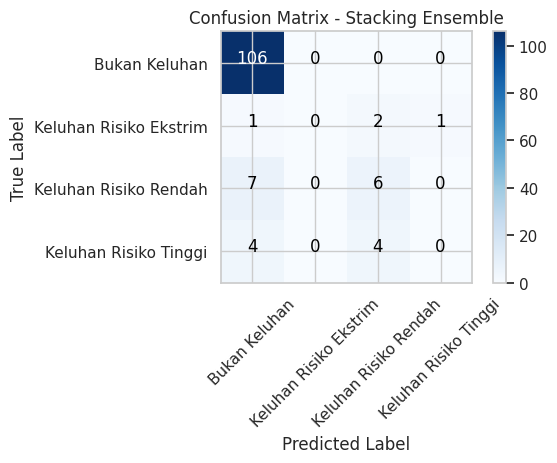

Confusion Matrix - Voting Ensemble:
[[106   0   0   0]
 [  3   0   0   1]
 [ 13   0   0   0]
 [  7   0   1   0]]


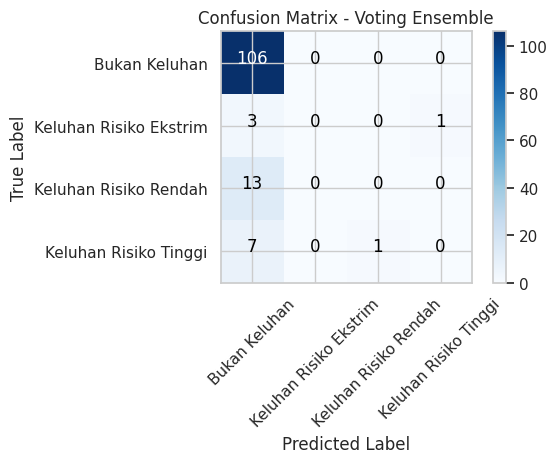

Confusion Matrix - Weighted Voting Ensemble:
[[106   0   0   0]
 [  3   0   0   1]
 [ 13   0   0   0]
 [  7   0   1   0]]


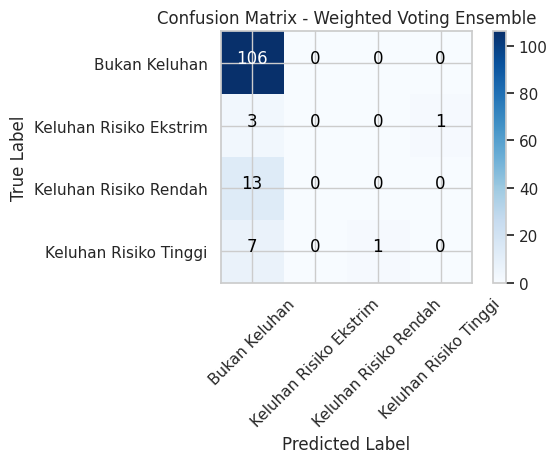

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Fungsi untuk memplot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(le.classes_))
    plt.xticks(tick_marks, le.classes_, rotation=45)
    plt.yticks(tick_marks, le.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    # Tambahkan angka pada setiap sel
    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.tight_layout()
    plt.show()

# 1. Confusion Matrix untuk Stacking Ensemble
cm_stack = confusion_matrix(y_meta_test, ensemble_preds_stack)
print("Confusion Matrix - Stacking Ensemble:")
print(cm_stack)
plot_confusion_matrix(cm_stack, "Confusion Matrix - Stacking Ensemble")

# 2. Confusion Matrix untuk Voting Ensemble
cm_vote = confusion_matrix(y_meta_test, vote_preds)
print("Confusion Matrix - Voting Ensemble:")
print(cm_vote)
plot_confusion_matrix(cm_vote, "Confusion Matrix - Voting Ensemble")

# 3. Confusion Matrix untuk Weighted Voting Ensemble
cm_weighted_vote = confusion_matrix(y_meta_test, weighted_vote_preds)
print("Confusion Matrix - Weighted Voting Ensemble:")
print(cm_weighted_vote)
plot_confusion_matrix(cm_weighted_vote, "Confusion Matrix - Weighted Voting Ensemble")
